In [1]:
import json
import folium
from folium.plugins import MarkerCluster
import mapclassify as mc
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [2]:
filename = "../data/no2_aggregated.csv"

In [3]:
gdf = gpd.read_file(filename)

In [4]:
gdf

timestamp        DsWrocWybCon        DsWrocAlWisn        DsWrocBartni  \
0     2015-01-01                23.2   38.88995652173913   20.61818695652174   
1     2015-01-02  19.603782608695653  40.156595833333334           18.787355   
2     2015-01-03   9.841541666666666   32.10990541666667  15.097285833333332   
3     2015-01-04   5.066333333333334           18.296405            7.000875   
4     2015-01-05  15.984333333333334  48.253254166666665           11.821145   
...          ...                 ...                 ...                 ...   
2187  2020-12-27   9.289996666666667  19.599699166666667          4.32571875   
2188  2020-12-28         15.35295625  26.838025416666667            5.426685   
2189  2020-12-29         33.82773125   40.42818956521739            8.544275   
2190  2020-12-30  44.449616666666664          64.3333875         24.57815375   
2191  2020-12-31  32.717166666666664  48.334962499999996          18.7765125   

     geometry  
0        None  
1        None  
2        None  
3        None  
4        None  
...       ...  
2187     None  
2188     None  
2189     None  
2190     None  
2191     None  

[2192 rows x 5 columns]

In [5]:
DsWrocWybCon = gdf[['timestamp', 'DsWrocWybCon', 'geometry']]
DsWrocAlWisn = gdf[['timestamp', 'DsWrocAlWisn', 'geometry']]
DsWrocBartni = gdf[['timestamp', 'DsWrocBartni', 'geometry']]

In [6]:
DsWrocWybConPoint = Point(17.029250, 51.129378)
DsWrocAlWisnPoint = Point(17.012689, 51.086225)
DsWrocBartniPoint = Point(17.141125, 51.115933)

In [7]:
DsWrocWybConPoints = []
DsWrocAlWisnPoints = []
DsWrocBartniPoints = []
for _ in range(len(gdf)):
    DsWrocWybConPoints.append(DsWrocWybConPoint)
    DsWrocAlWisnPoints.append(DsWrocAlWisnPoint)
    DsWrocBartniPoints.append(DsWrocBartniPoint)

In [8]:
DsWrocWybCon['geometry'] = DsWrocWybConPoints
DsWrocAlWisn['geometry'] = DsWrocAlWisnPoints
DsWrocBartni['geometry'] = DsWrocBartniPoints

C:\Users\Mati\anaconda3\envs\geo-tutorial\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Mati\anaconda3\envs\geo-tutorial\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\Mati\anaconda3\envs\geo-tutorial\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [9]:
DsWrocWybConName = 'DsWrocWybCon'
DsWrocAlWisnName = 'DsWrocAlWisn'
DsWrocBartniName = 'DsWrocBartni'

DsWrocWybConNames = []
DsWrocAlWisnNames = []
DsWrocBartniNames = []
for _ in range(len(gdf)):
    DsWrocWybConNames.append(DsWrocWybConName)
    DsWrocAlWisnNames.append(DsWrocAlWisnName)
    DsWrocBartniNames.append(DsWrocBartniName)

DsWrocWybCon['station_name'] = DsWrocWybConName
DsWrocAlWisn['station_name'] = DsWrocAlWisnName
DsWrocBartni['station_name'] = DsWrocBartniName

In [10]:
DsWrocWybCon = DsWrocWybCon.rename(columns ={'DsWrocWybCon':'Value'})
DsWrocAlWisn = DsWrocAlWisn.rename(columns ={'DsWrocAlWisn':'Value'})
DsWrocBartni = DsWrocBartni.rename(columns ={'DsWrocBartni':'Value'})

In [11]:
DsWrocBartni

timestamp               Value                   geometry  station_name
0     2015-01-01   20.61818695652174  POINT (17.14112 51.11593)  DsWrocBartni
1     2015-01-02           18.787355  POINT (17.14112 51.11593)  DsWrocBartni
2     2015-01-03  15.097285833333332  POINT (17.14112 51.11593)  DsWrocBartni
3     2015-01-04            7.000875  POINT (17.14112 51.11593)  DsWrocBartni
4     2015-01-05           11.821145  POINT (17.14112 51.11593)  DsWrocBartni
...          ...                 ...                        ...           ...
2187  2020-12-27          4.32571875  POINT (17.14112 51.11593)  DsWrocBartni
2188  2020-12-28            5.426685  POINT (17.14112 51.11593)  DsWrocBartni
2189  2020-12-29            8.544275  POINT (17.14112 51.11593)  DsWrocBartni
2190  2020-12-30         24.57815375  POINT (17.14112 51.11593)  DsWrocBartni
2191  2020-12-31          18.7765125  POINT (17.14112 51.11593)  DsWrocBartni

[2192 rows x 4 columns]

In [12]:
for _, row in DsWrocAlWisn.iterrows():
    DsWrocWybCon = DsWrocWybCon.append(row)

In [13]:
for _, row in DsWrocBartni.iterrows():
    DsWrocWybCon = DsWrocWybCon.append(row)

In [14]:
gdf = DsWrocWybCon
gdf

timestamp               Value                   geometry  station_name
0     2015-01-01                23.2  POINT (17.02925 51.12938)  DsWrocWybCon
1     2015-01-02  19.603782608695653  POINT (17.02925 51.12938)  DsWrocWybCon
2     2015-01-03   9.841541666666666  POINT (17.02925 51.12938)  DsWrocWybCon
3     2015-01-04   5.066333333333334  POINT (17.02925 51.12938)  DsWrocWybCon
4     2015-01-05  15.984333333333334  POINT (17.02925 51.12938)  DsWrocWybCon
...          ...                 ...                        ...           ...
2187  2020-12-27          4.32571875  POINT (17.14112 51.11593)  DsWrocBartni
2188  2020-12-28            5.426685  POINT (17.14112 51.11593)  DsWrocBartni
2189  2020-12-29            8.544275  POINT (17.14112 51.11593)  DsWrocBartni
2190  2020-12-30         24.57815375  POINT (17.14112 51.11593)  DsWrocBartni
2191  2020-12-31          18.7765125  POINT (17.14112 51.11593)  DsWrocBartni

[6576 rows x 4 columns]

<AxesSubplot:>

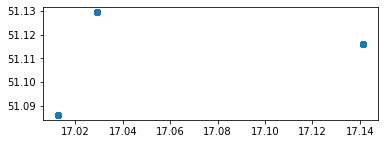

In [15]:
gdf.plot()

In [16]:
gdf2 = gpd.read_file('../data/GraniceOsiedli/GraniceOsiedli.shp')
gdf2 = gdf2.to_crs("EPSG:4326")

In [17]:
gdf2

OBJECTID  NROSIEDLA                                      NAZWAOSIED  \
0        340         21                              Krzyki - Partynice   
1        341         24                           Gądów - Popowice Płd.   
2        348         42                                     Sołtysowice   
3        349         18                                      Bieńkowice   
4        351         32                                         Żerniki   
5        352         29                                 Muchobór Wielki   
6        353         10                           Przedmieście Oławskie   
7        354         14                                             Gaj   
8        355         48                                        Wojszyce   
9        356         15                                           Borek   
10       357         20                                        Ołtaszyn   
11       358         22                                         Klecina   
12       359         25                                   Muchobór Mały   
13       342         11                                        Tarnogaj   
14       343         43                 Polanowice - Poświętne - Ligota   
15       344          7                                Plac Grunwaldzki   
16       345          4                                        Nadodrze   
17       346         19                                         Jagodno   
18       347         30                                       Nowy Dwór   
19       321         12                                            Huby   
20       322         33  Jerzmanowo - Jarnołtów - Strachowice - Osiniec   
21       323         31                                         Kuźniki   
22       324         16                                          Księże   
23       325         41                                       Pawłowice   
24       326         46                                        Świniary   
25       327         45                                 Lipa Piotrowska   
26       328          2                         Przedmieście Świdnickie   
27       329         38                                          Kowale   
28       330          1                                    Stare Miasto   
29       331          8                  Zacisze - Zalesie - Szczytniki   
30       332         27                         Grabiszyn - Grabiszynek   
31       333         36                               Pracze Odrzańskie   
32       334         28                                          Oporów   
33       335         47                              Osobowice - Rędzin   
34       336         39                 Strachocin - Swojczyce - Wojnów   
35       337         40                           Psie Pole - Zawidawie   
36       338         37                             Karłowice - Różanka   
37       339         23              Pilczyce - Kozanów - Popowice Płn.   
38       350         34                                         Leśnica   
39       362         13                             Powstańców Śląskich   
40       363         26                                        Gajowice   
41       364          3                                        Szczepin   
42       365         35                                         Maślice   
43       366          6                                           Ołbin   
44       367          5                                        Kleczków   
45       368          9       Biskupin - Sępolno - Dąbie - Bartoszowice   
46       360         17                                         Brochów   
47       361         44                                          Widawa   

          DATA    SHAPE_AREA     SHAPE_LEN  \
0   2016-01-21  5.254965e+06   9994.583078   
1   2016-01-21  3.134569e+06   7588.647951   
2   2016-01-21  4.547041e+06   9003.773230   
3   2016-01-21  1.433161e+06   4760.314072   
4   2016-01-21  3.908726e+06   9132.805421   
5   2016-01-21  6.879545e+06  13228.130080   
6   20

<AxesSubplot:>

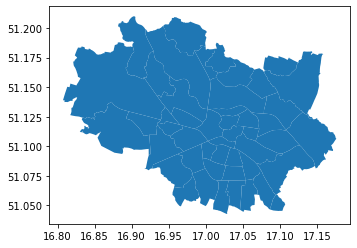

In [18]:
gdf2.plot()

In [19]:
DsWrocWybConName = 'DsWrocWybCon'
DsWrocAlWisnName = 'DsWrocAlWisn'
DsWrocBartniName = 'DsWrocBartni'

DsWrocWybConPoint = Point(17.029250, 51.129378)
DsWrocAlWisnPoint = Point(17.012689, 51.086225)
DsWrocBartniPoint = Point(17.141125, 51.115933)

In [20]:
def calculate_distance(pnt1, pnt2):
    points_df = gpd.GeoDataFrame({'geometry': [pnt1, pnt2]}, crs='EPSG:4326')
    points_df = points_df.to_crs('EPSG:5234')
    points_df2 = points_df.shift() #We shift the dataframe by 1 to align pnt1 with pnt2
    return points_df.distance(points_df2)[1]

In [21]:
idx = 0
stations = []
names = [DsWrocWybConName, DsWrocAlWisnName, DsWrocBartniName]
for _, row in gdf2.iterrows():
    
    pnt1 = row.geometry.centroid
    pnt2 = DsWrocWybConPoint
    min_distance = calculate_distance(pnt1, pnt2)
    name = DsWrocWybConName
    
    pnt2 = DsWrocAlWisnPoint
    distance2 = calculate_distance(pnt1, pnt2)
    if distance2 < min_distance:
        min_distance = distance2
        name = DsWrocAlWisnName
    
    pnt2 = DsWrocBartniPoint
    distance3 = calculate_distance(pnt1, pnt2)
    if distance3 < min_distance:
        min_distance = distance3
        name = DsWrocBartniName
    
    stations.append(name)

In [22]:
gdf2['station'] = stations

<AxesSubplot:>

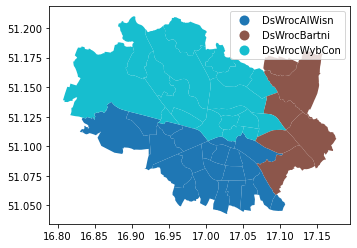

In [23]:
gdf2.plot(column='station', legend=True)

In [24]:
gdf2

OBJECTID  NROSIEDLA                                      NAZWAOSIED  \
0        340         21                              Krzyki - Partynice   
1        341         24                           Gądów - Popowice Płd.   
2        348         42                                     Sołtysowice   
3        349         18                                      Bieńkowice   
4        351         32                                         Żerniki   
5        352         29                                 Muchobór Wielki   
6        353         10                           Przedmieście Oławskie   
7        354         14                                             Gaj   
8        355         48                                        Wojszyce   
9        356         15                                           Borek   
10       357         20                                        Ołtaszyn   
11       358         22                                         Klecina   
12       359         25                                   Muchobór Mały   
13       342         11                                        Tarnogaj   
14       343         43                 Polanowice - Poświętne - Ligota   
15       344          7                                Plac Grunwaldzki   
16       345          4                                        Nadodrze   
17       346         19                                         Jagodno   
18       347         30                                       Nowy Dwór   
19       321         12                                            Huby   
20       322         33  Jerzmanowo - Jarnołtów - Strachowice - Osiniec   
21       323         31                                         Kuźniki   
22       324         16                                          Księże   
23       325         41                                       Pawłowice   
24       326         46                                        Świniary   
25       327         45                                 Lipa Piotrowska   
26       328          2                         Przedmieście Świdnickie   
27       329         38                                          Kowale   
28       330          1                                    Stare Miasto   
29       331          8                  Zacisze - Zalesie - Szczytniki   
30       332         27                         Grabiszyn - Grabiszynek   
31       333         36                               Pracze Odrzańskie   
32       334         28                                          Oporów   
33       335         47                              Osobowice - Rędzin   
34       336         39                 Strachocin - Swojczyce - Wojnów   
35       337         40                           Psie Pole - Zawidawie   
36       338         37                             Karłowice - Różanka   
37       339         23              Pilczyce - Kozanów - Popowice Płn.   
38       350         34                                         Leśnica   
39       362         13                             Powstańców Śląskich   
40       363         26                                        Gajowice   
41       364          3                                        Szczepin   
42       365         35                                         Maślice   
43       366          6                                           Ołbin   
44       367          5                                        Kleczków   
45       368          9       Biskupin - Sępolno - Dąbie - Bartoszowice   
46       360         17                                         Brochów   
47       361         44                                          Widawa   

          DATA    SHAPE_AREA     SHAPE_LEN  \
0   2016-01-21  5.254965e+06   9994.583078   
1   2016-01-21  3.134569e+06   7588.647951   
2   2016-01-21  4.547041e+06   9003.773230   
3   2016-01-21  1.433161e+06   4760.314072   
4   2016-01-21  3.908726e+06   9132.805421   
5   2016-01-21  6.879545e+06  13228.130080   
6   20

In [25]:
from shapely.ops import unary_union

def union_polygons(gdfp):
    polygons = []

    for _, row in gdfp.iterrows():
        polygons.append(row.geometry)

    boundary = gpd.GeoSeries(unary_union(polygons))
    return boundary

In [26]:
from tqdm import tqdm

geometries = []
for _, row in tqdm(gdf.iterrows()):
    gdfp = gdf2[gdf2.station == row.station_name]
    geometry = union_polygons(gdfp)
    geometries.append(geometry[0])


6576it [02:14, 48.87it/s] 


In [27]:
gdf['geometry'] = geometries

<AxesSubplot:>

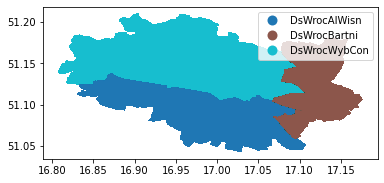

In [28]:
gdf.plot(column='station_name', legend=True)

In [133]:
gdf

timestamp               Value  \
0     2015-01-01                23.2   
1     2015-01-02  19.603782608695653   
2     2015-01-03   9.841541666666666   
3     2015-01-04   5.066333333333334   
4     2015-01-05  15.984333333333334   
...          ...                 ...   
2187  2020-12-27          4.32571875   
2188  2020-12-28            5.426685   
2189  2020-12-29            8.544275   
2190  2020-12-30         24.57815375   
2191  2020-12-31          18.7765125   

                                               geometry  station_name  
0     POLYGON ((17.02143 51.10808, 17.02135 51.10808...  DsWrocWybCon  
1     POLYGON ((17.02143 51.10808, 17.02135 51.10808...  DsWrocWybCon  
2     POLYGON ((17.02143 51.10808, 17.02135 51.10808...  DsWrocWybCon  
3     POLYGON ((17.02143 51.10808, 17.02135 51.10808...  DsWrocWybCon  
4     POLYGON ((17.02143 51.10808, 17.02135 51.10808...  DsWrocWybCon  
...                                                 ...           ...  
2187  POLYGON ((17.14563 51.08267, 17.14504 51.08242...  DsWrocBartni  
2188  POLYGON ((17.14563 51.08267, 17.14504 51.08242...  DsWrocBartni  
2189  POLYGON ((17.14563 51.08267, 17.14504 51.08242...  DsWrocBartni  
2190  POLYGON ((17.14563 51.08267, 17.14504 51.08242...  DsWrocBartni  
2191  POLYGON ((17.14563 51.08267, 17.14504 51.08242...  DsWrocBartni  

[6576 rows x 4 columns]

In [30]:
timestamps = np.sort(np.unique(gdf.timestamp.values))
polygons = [gdf[gdf.station_name == DsWrocWybConName].geometry[0], gdf[gdf.station_name == DsWrocAlWisnName].geometry[0], gdf[gdf.station_name == DsWrocBartniName].geometry[0]]

<AxesSubplot:>

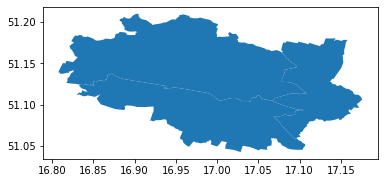

In [31]:
df = pd.DataFrame(polygons, columns =['geometry'])
polygons = gpd.GeoDataFrame(df)
polygons.plot()

In [99]:
import statistics
years = [2015, 2016, 2017, 2018, 2019, 2020]
df = pd.DataFrame(columns=['timestamp', 'Value', 'geometry', 'station_name'])
names = [DsWrocWybConName, DsWrocAlWisnName, DsWrocBartniName]

for year in years:
    for month in range(12):
        if month < 9:
            mon = f'0{month + 1}'
        else:
            mon = f'{month + 1}'
            
        for name in names:
            values = []

            for _, row in gdf.iterrows():
                if row.timestamp[:7] == f'{year}-{mon}' and row.station_name == name:
                    values.append(float(row.Value))
            geometry = gdf[gdf.station_name == name].geometry[0]
            if len(values) == 0:
                mean = 0
            else:
                mean = statistics.mean(values)
            df2 = pd.DataFrame(data=[[f'{year}-{mon}', mean, geometry, name]], columns=['timestamp', 'Value', 'geometry', 'station_name'])
            df = df.append(df2)


In [100]:
gifs = gpd.GeoDataFrame(df)

In [101]:
df

timestamp      Value                                           geometry  \
0    2015-01  23.634172  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0    2015-01  45.268857  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0    2015-01  15.790602  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0    2015-02  28.775928  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0    2015-02  58.203007  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
..       ...        ...                                                ...   
0    2020-11  38.569260  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0    2020-11  16.146546  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0    2020-12  24.752596  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0    2020-12  36.769450  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0    2020-12  15.515196  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   

    station_name  
0   DsWrocWybCon  
0   DsWrocAlWisn  
0   DsWrocBartni  
0   DsWrocWybCon  
0   DsWrocAlWisn  
..           ...  
0   DsWrocAlWisn  
0   DsWrocBartni  
0   DsWrocWybCon  
0   DsWrocAlWisn  
0   DsWrocBartni  

[216 rows x 4 columns]

In [102]:
gifs

timestamp      Value                                           geometry  \
0    2015-01  23.634172  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0    2015-01  45.268857  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0    2015-01  15.790602  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0    2015-02  28.775928  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0    2015-02  58.203007  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
..       ...        ...                                                ...   
0    2020-11  38.569260  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0    2020-11  16.146546  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0    2020-12  24.752596  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0    2020-12  36.769450  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0    2020-12  15.515196  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   

    station_name  
0   DsWrocWybCon  
0   DsWrocAlWisn  
0   DsWrocBartni  
0   DsWrocWybCon  
0   DsWrocAlWisn  
..           ...  
0   DsWrocAlWisn  
0   DsWrocBartni  
0   DsWrocWybCon  
0   DsWrocAlWisn  
0   DsWrocBartni  

[216 rows x 4 columns]

<AxesSubplot:>

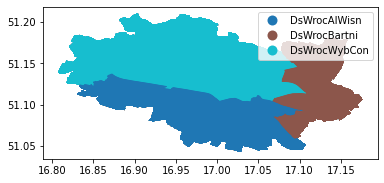

In [110]:
gifs.plot(column='station_name', legend=True)

C:\Users\Mati\anaconda3\envs\geo-tutorial\lib\site-packages\geopandas\plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


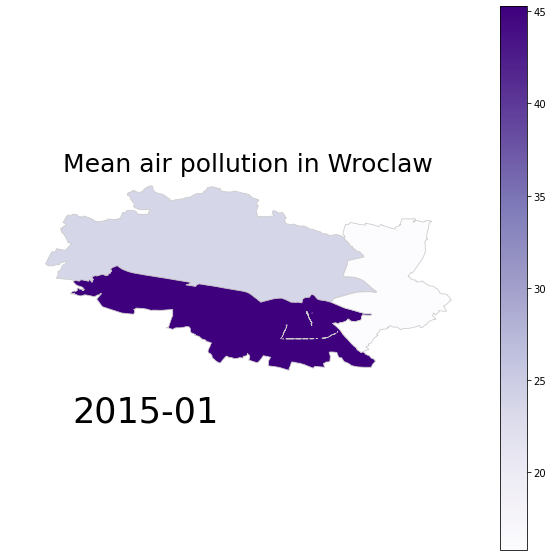

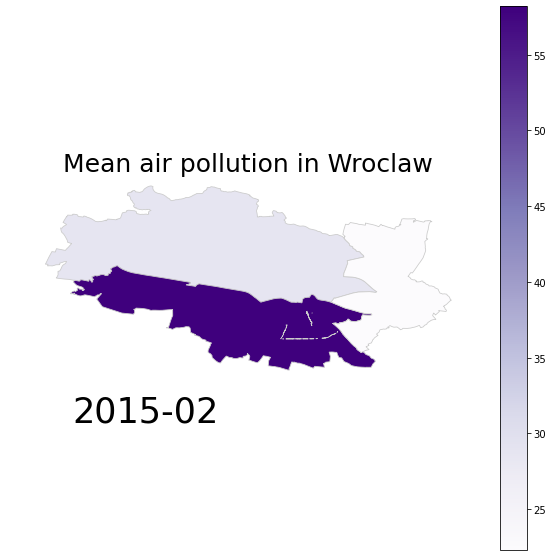

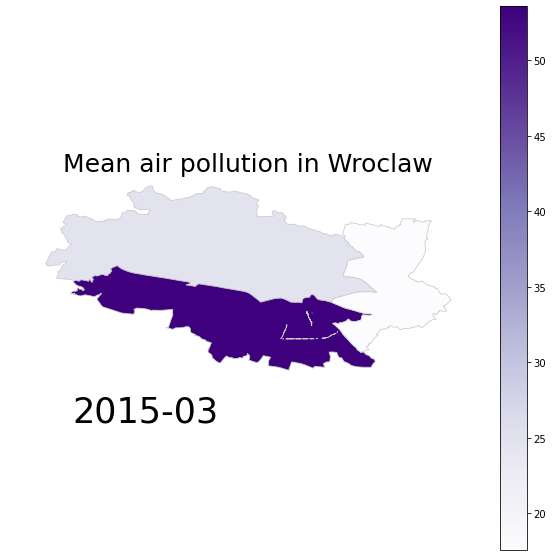

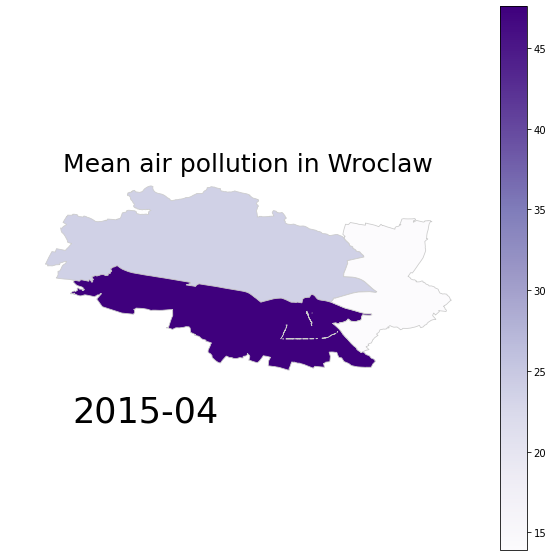

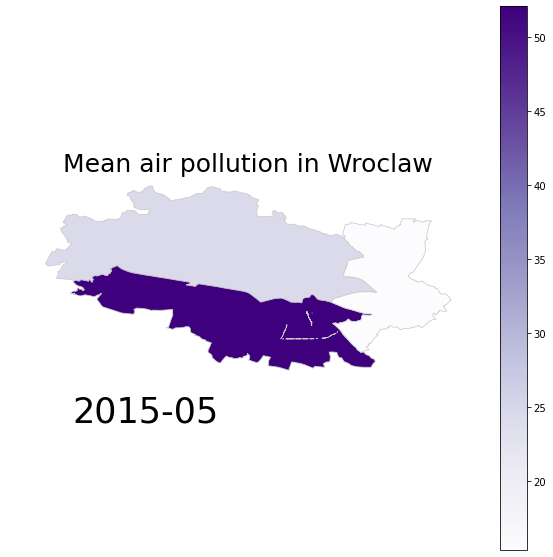

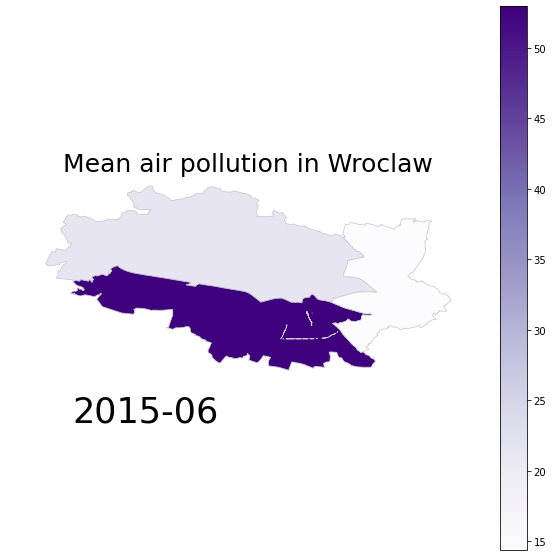

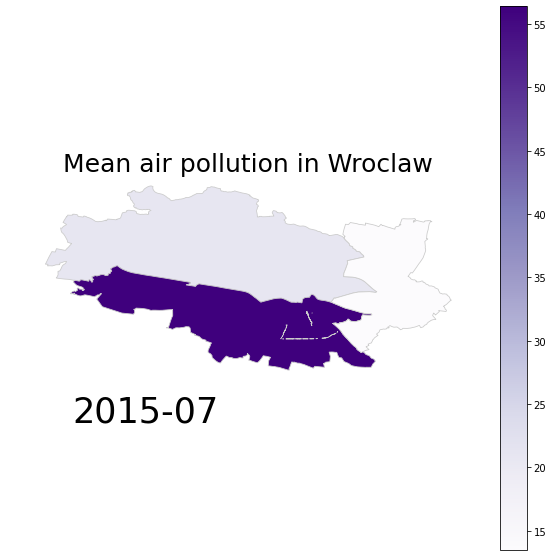

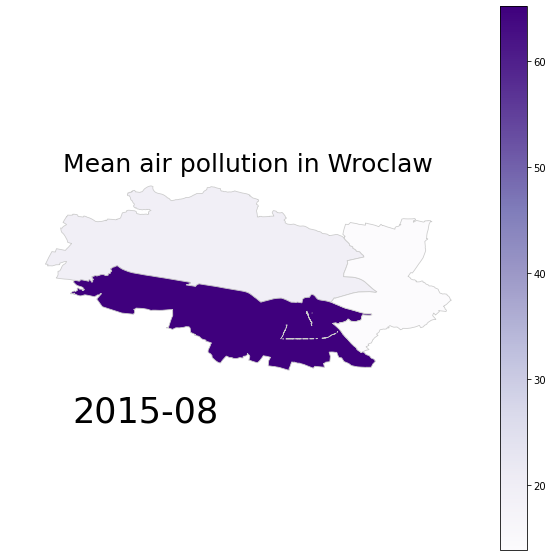

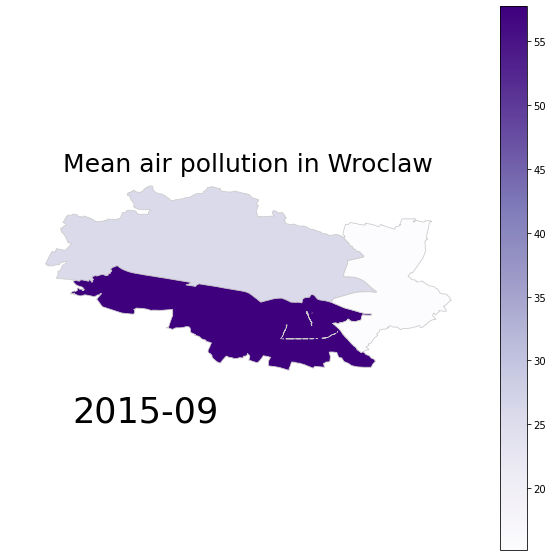

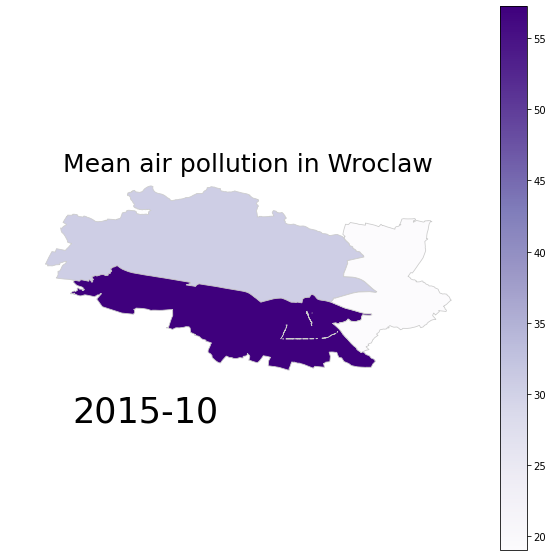

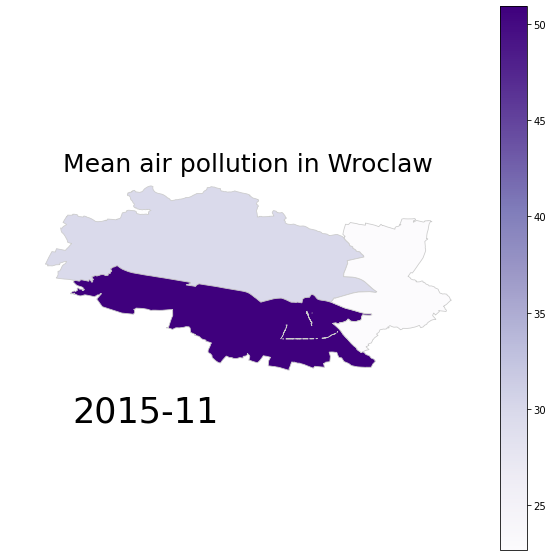

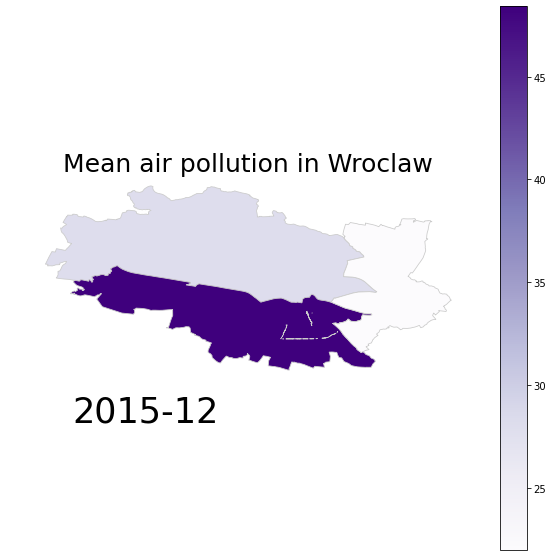

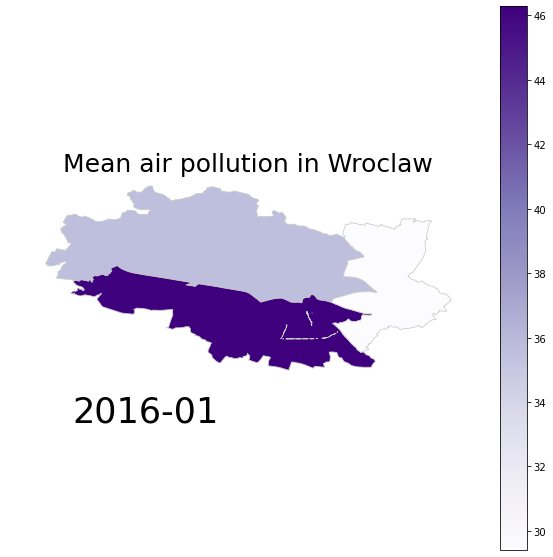

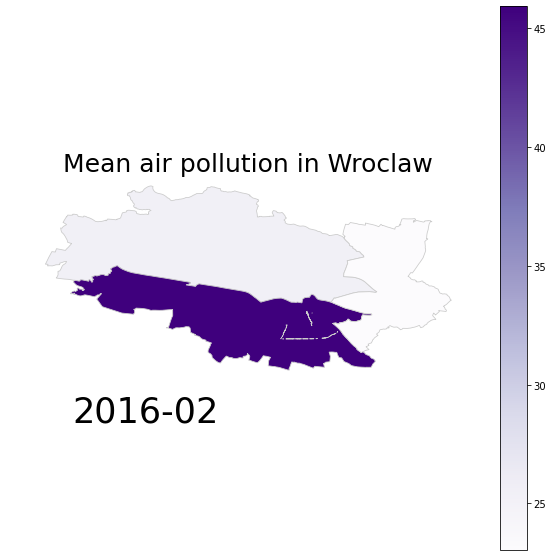

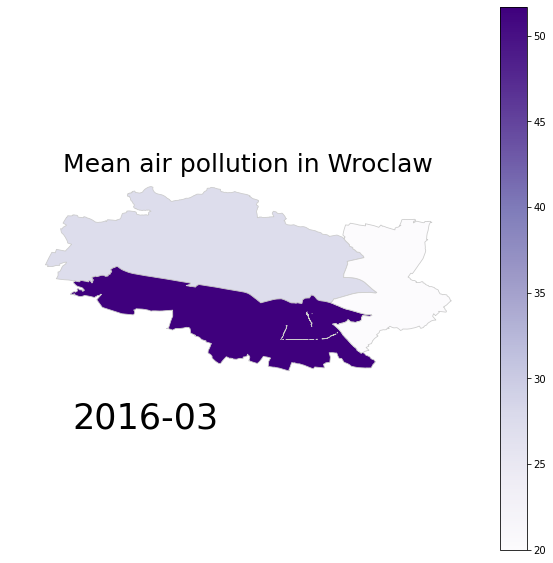

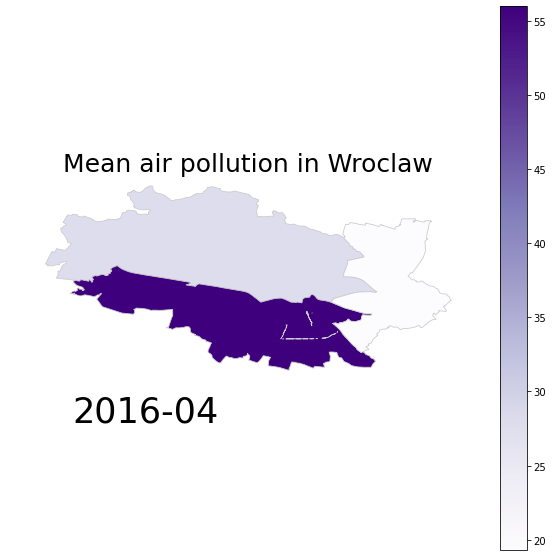

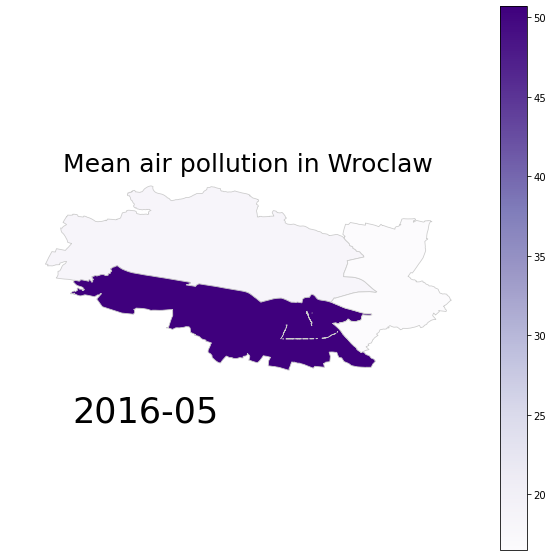

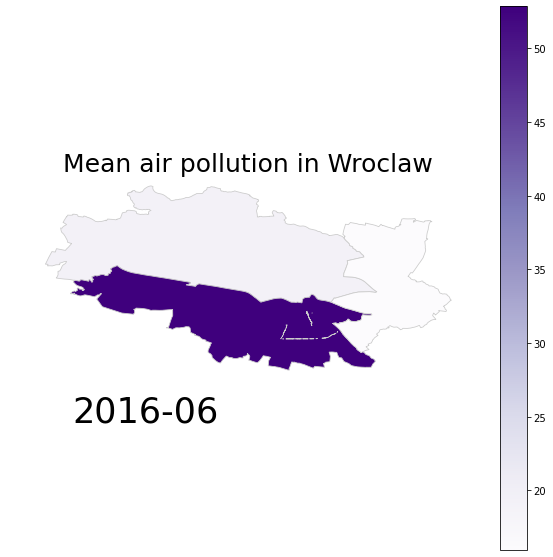

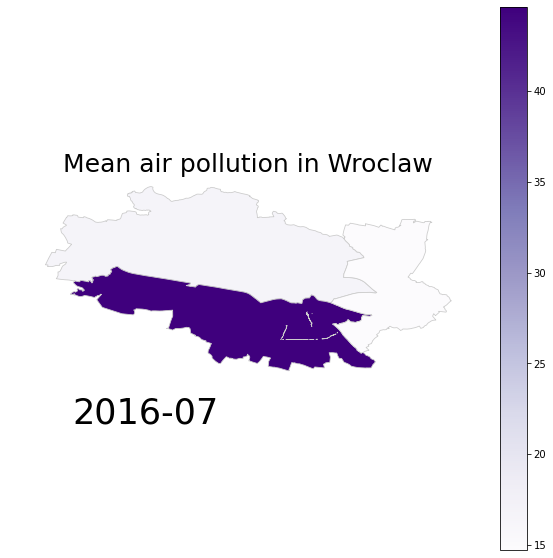

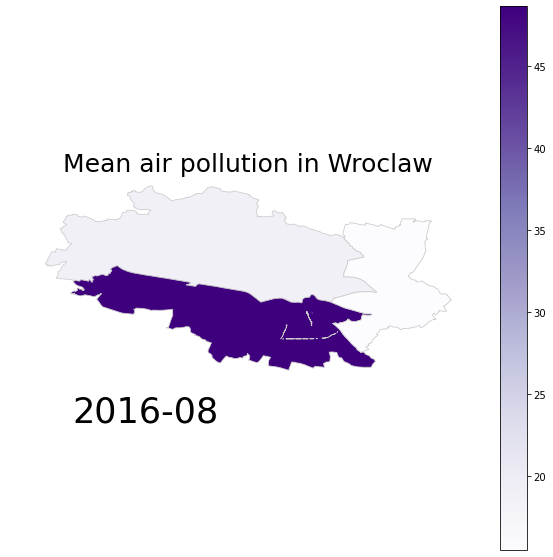

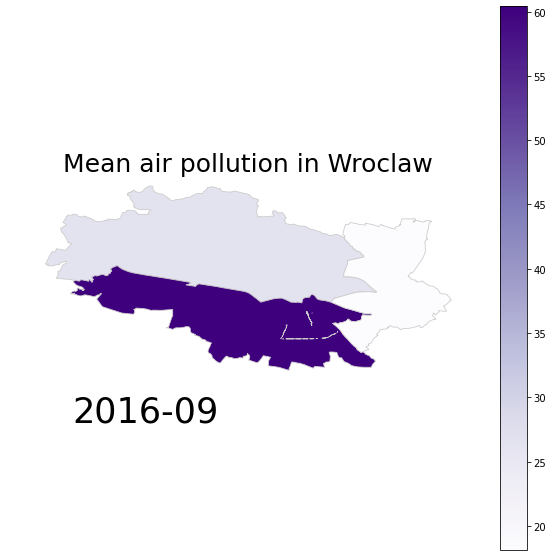

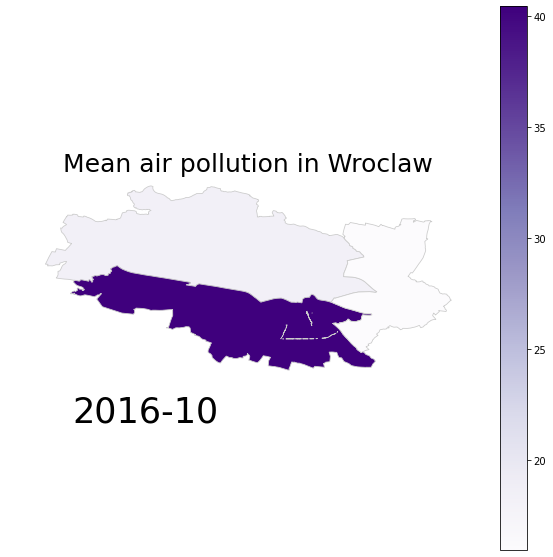

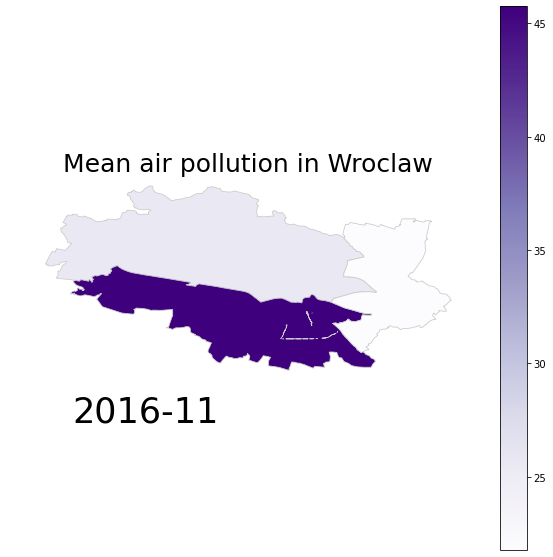

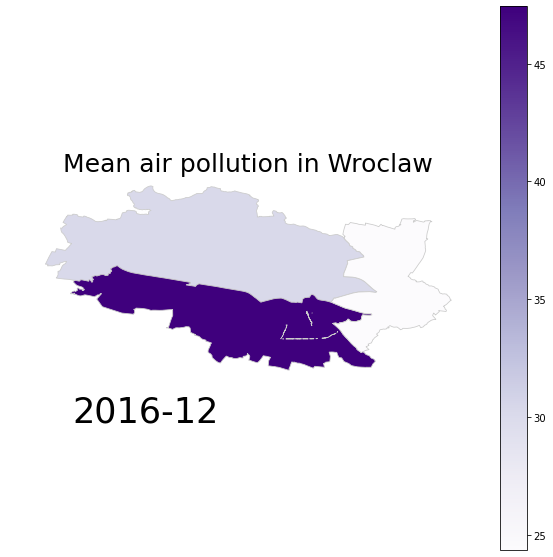

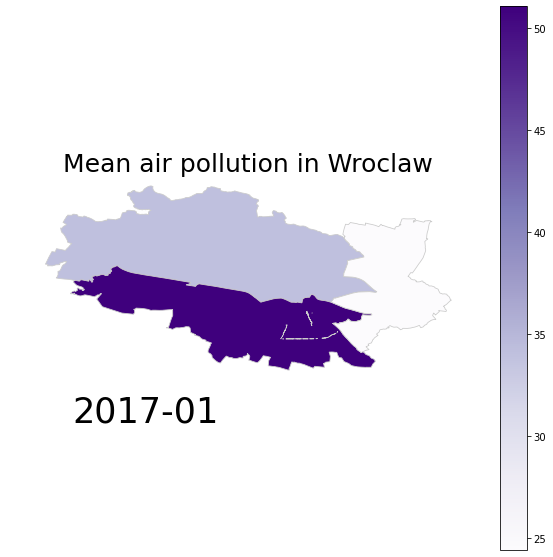

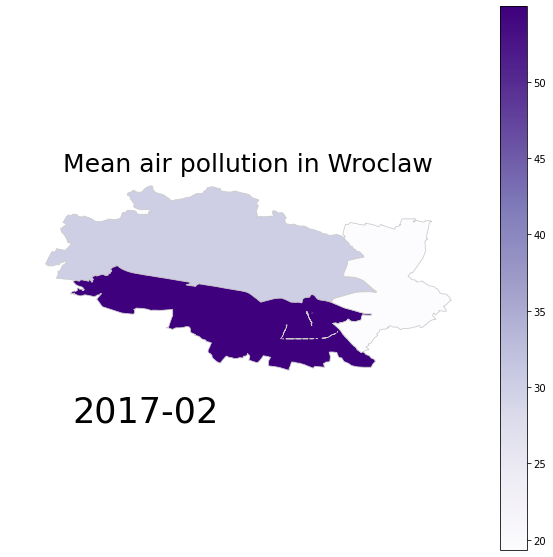

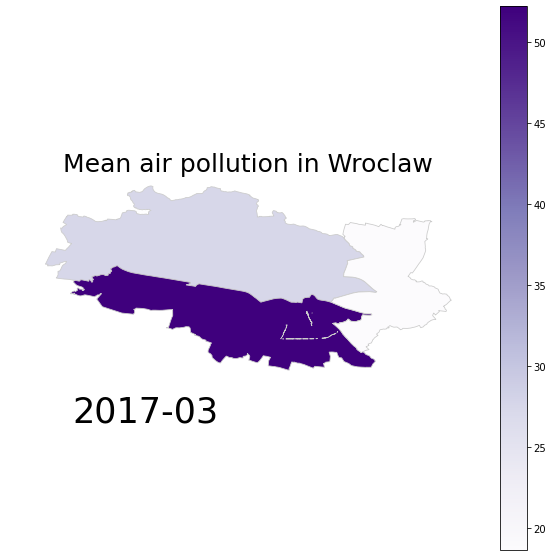

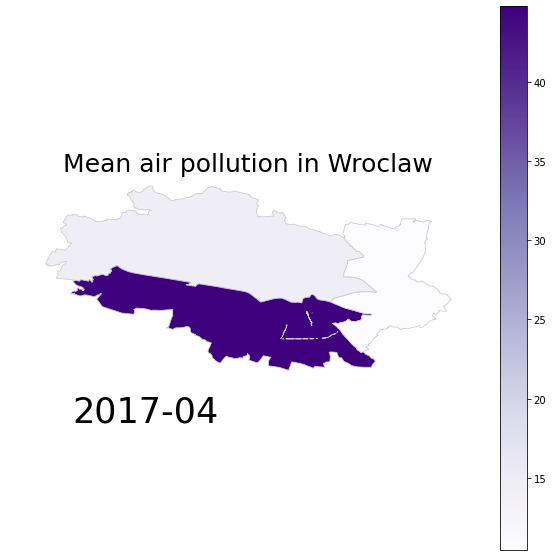

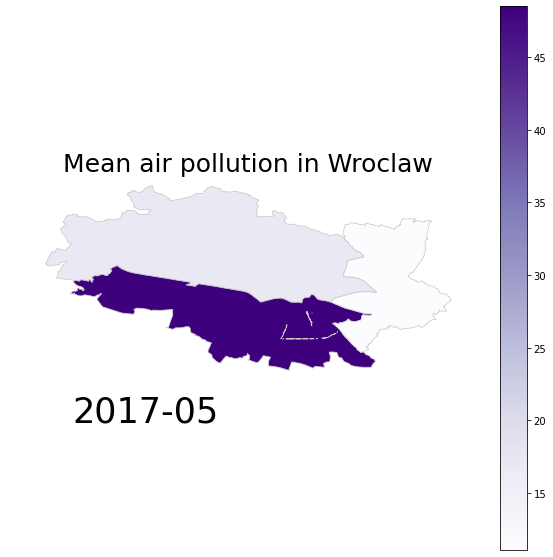

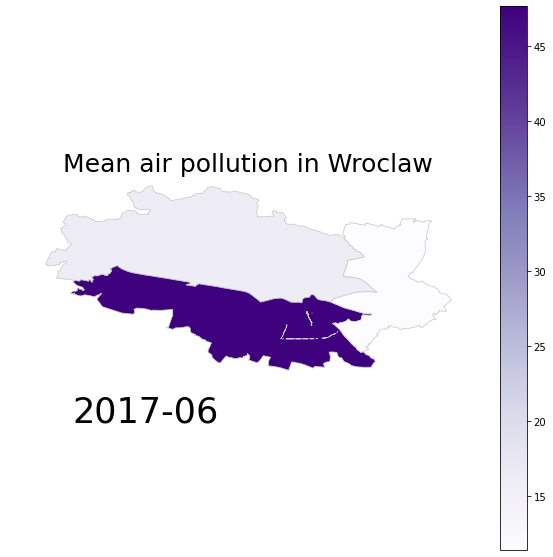

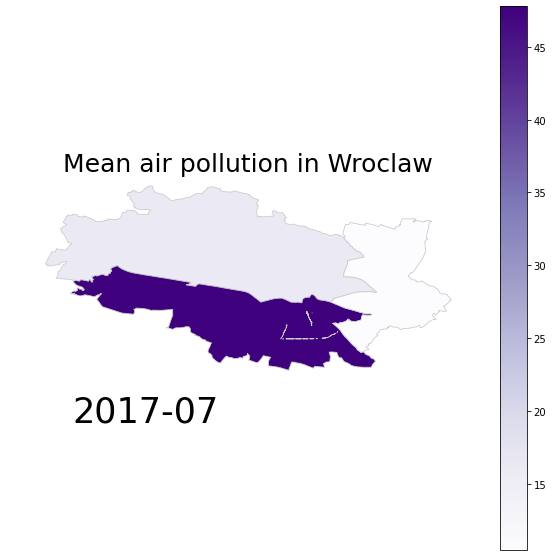

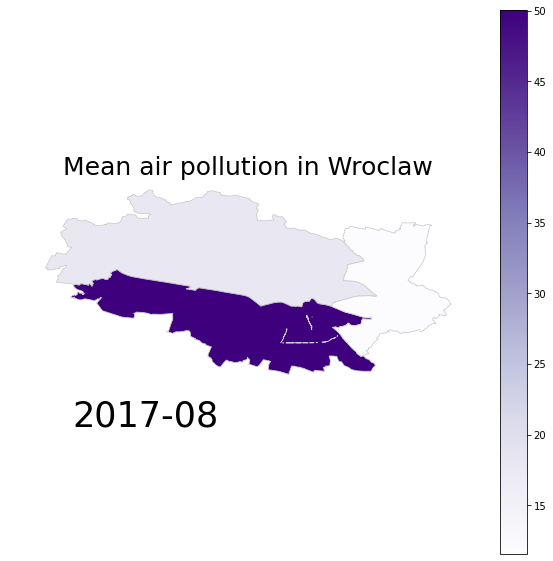

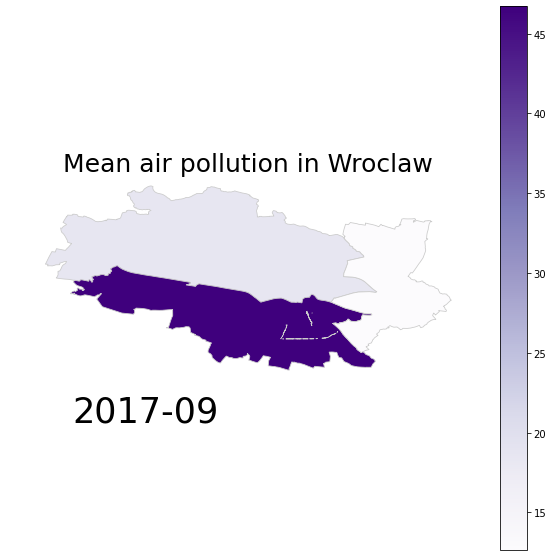

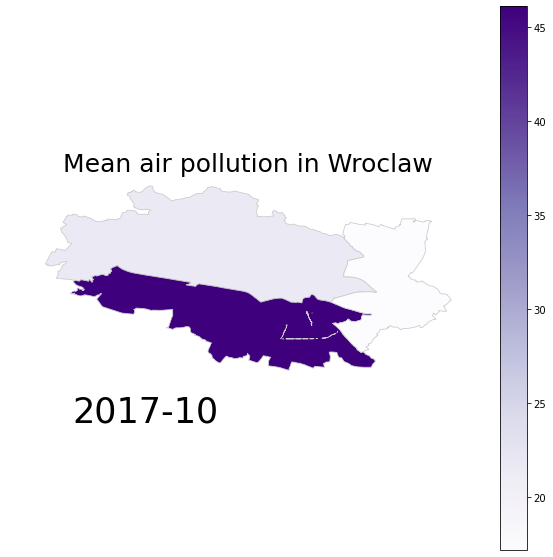

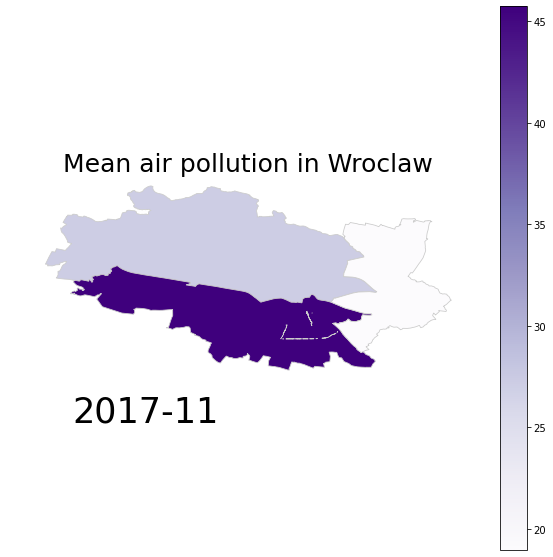

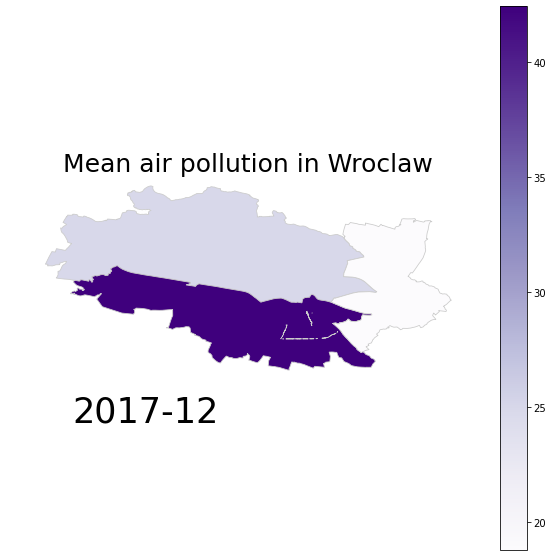

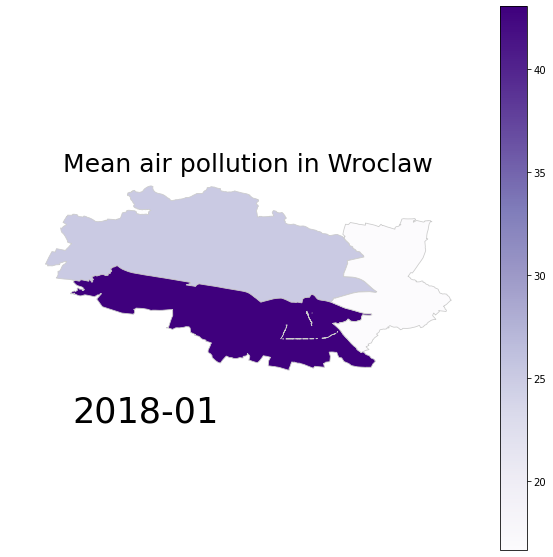

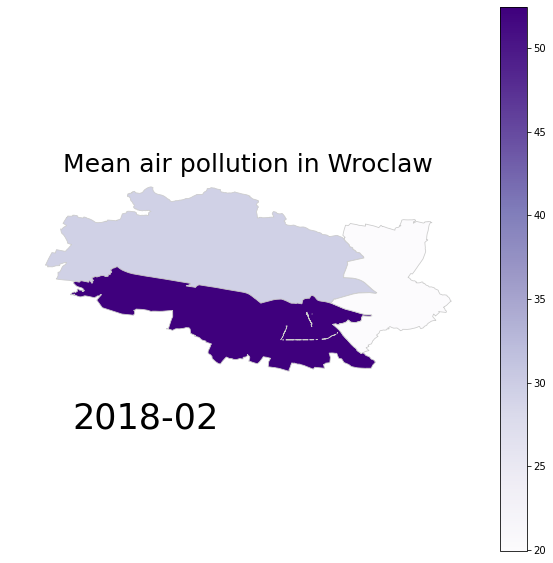

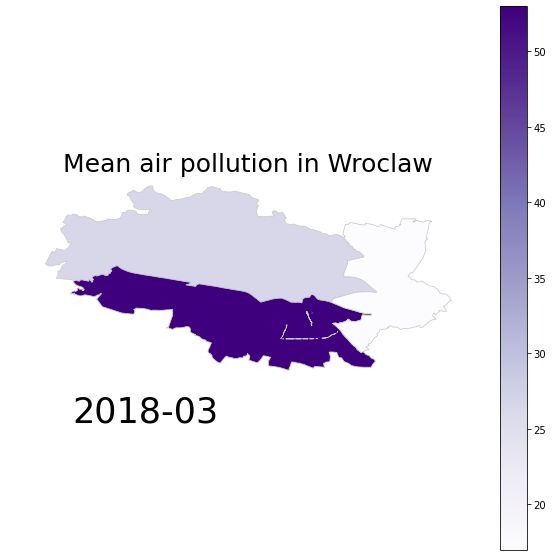

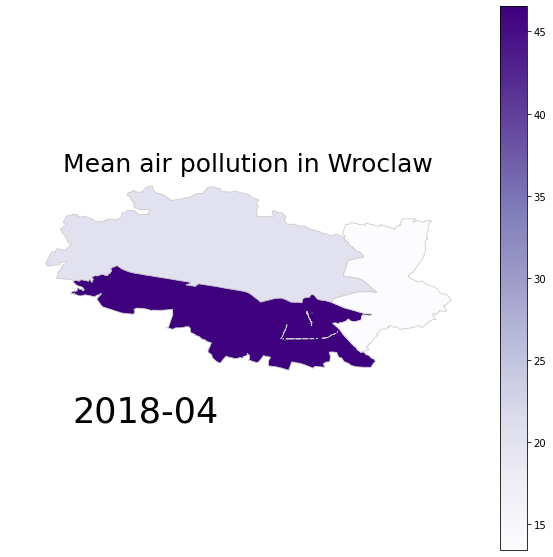

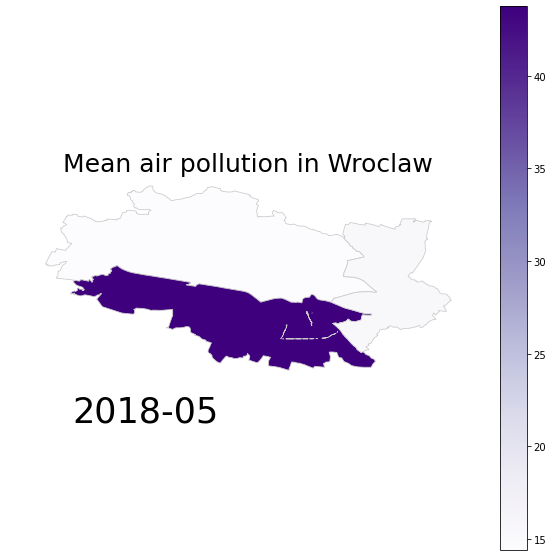

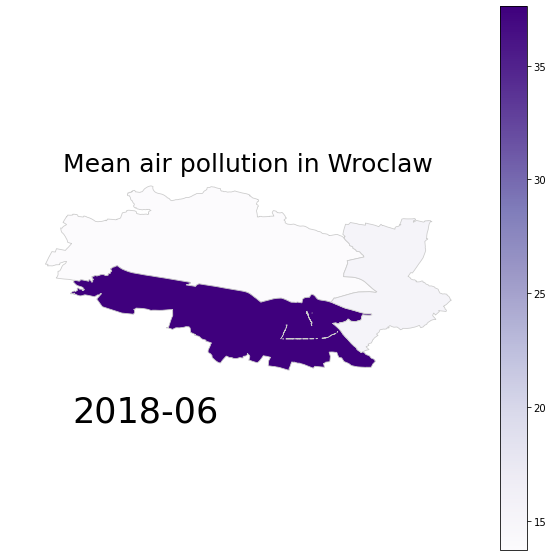

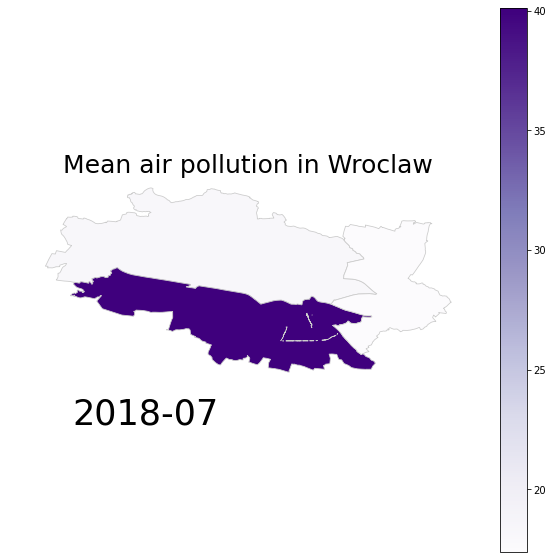

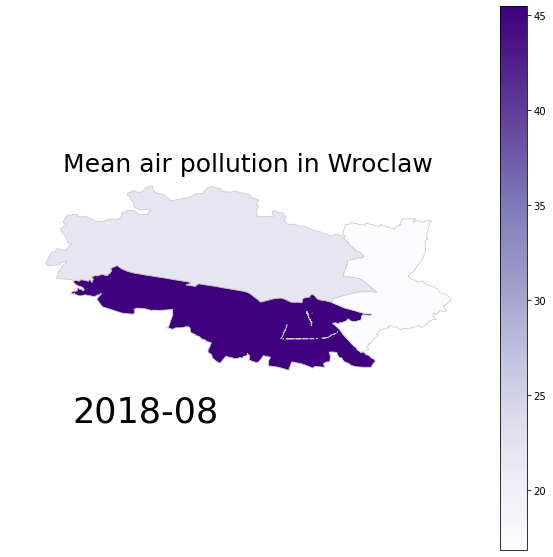

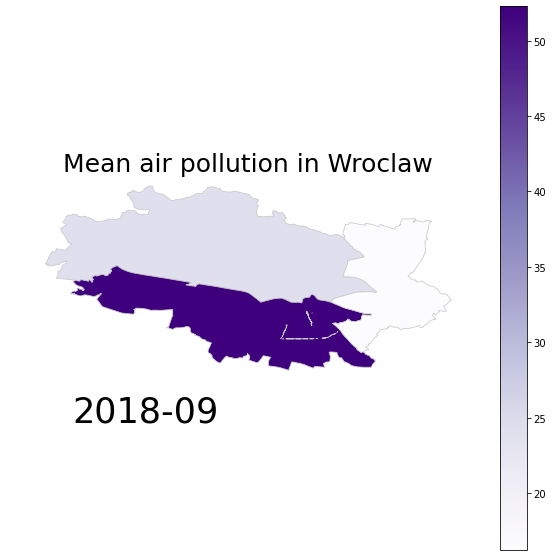

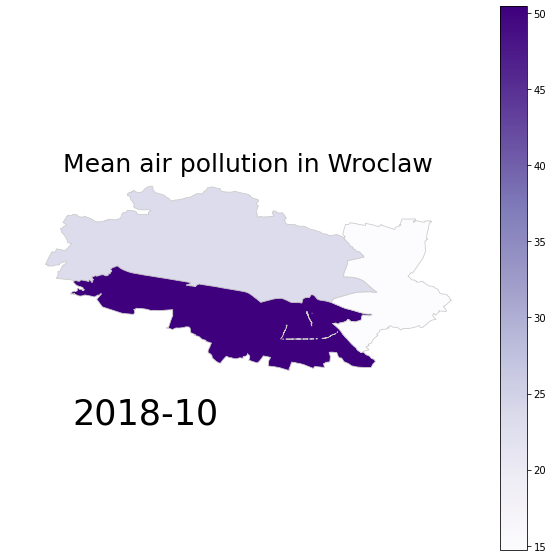

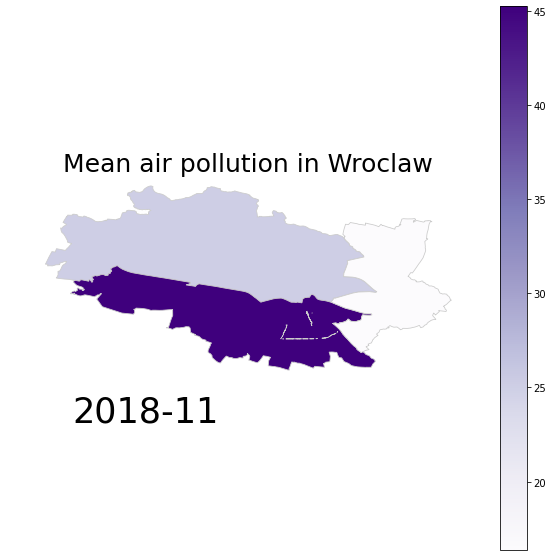

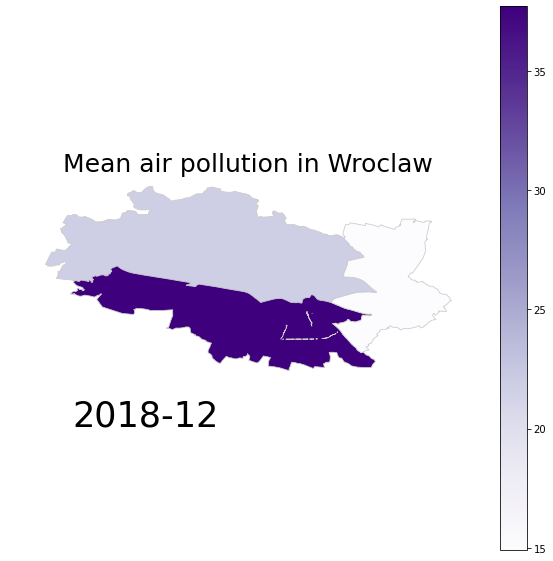

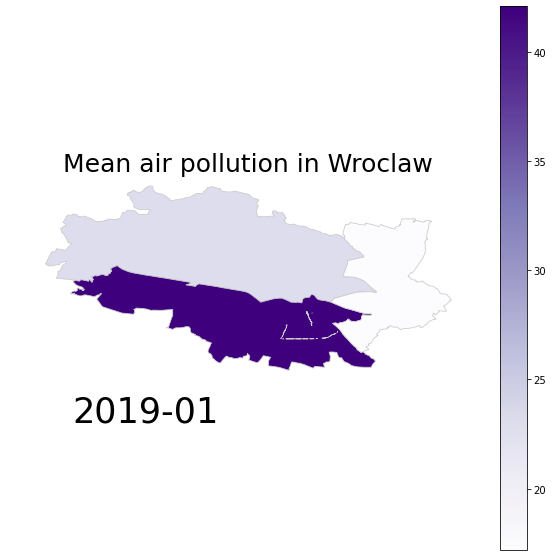

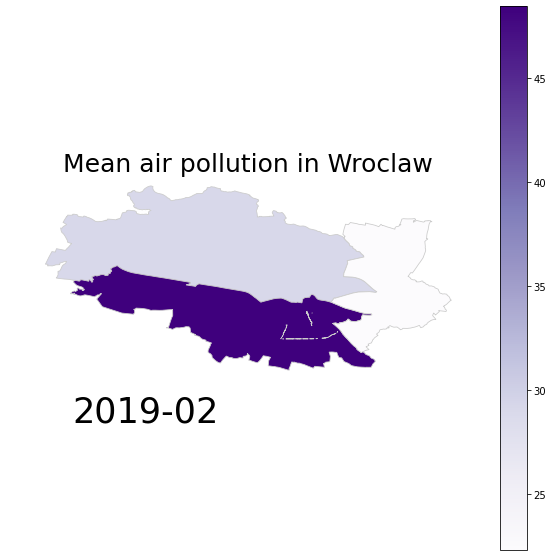

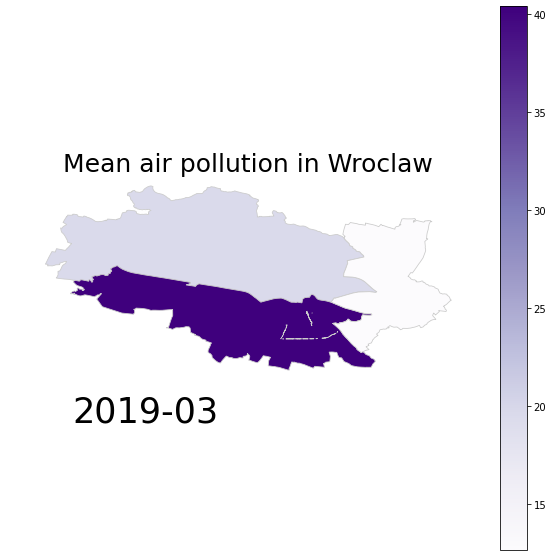

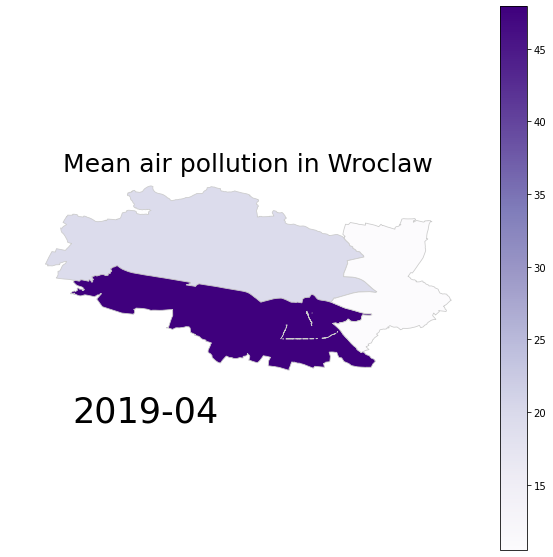

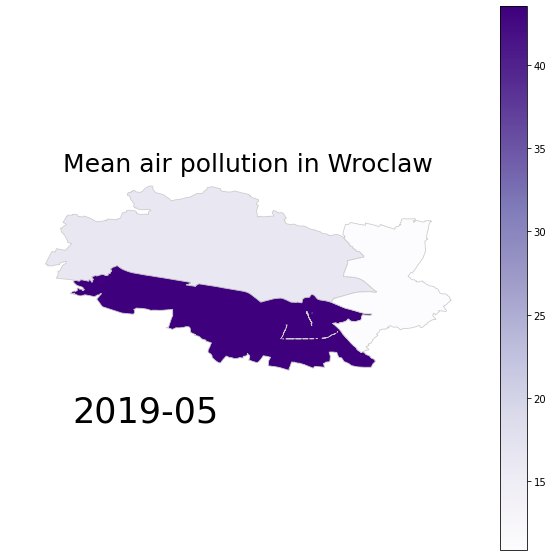

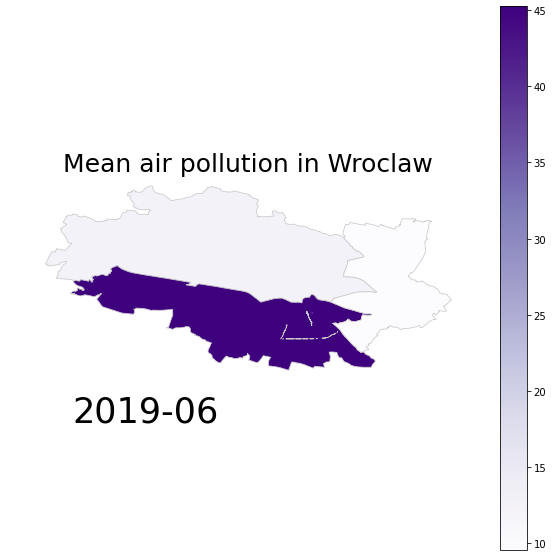

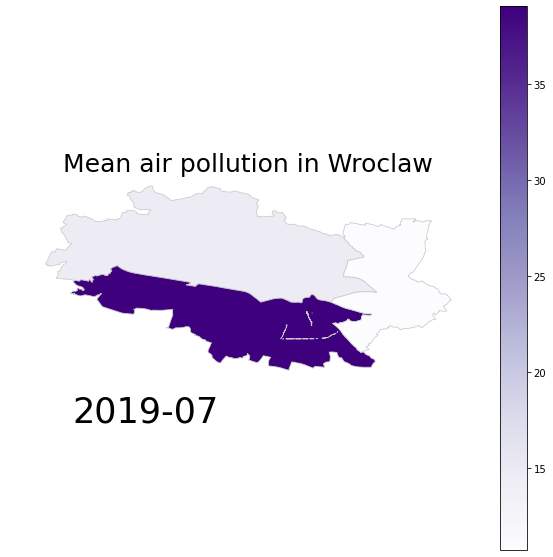

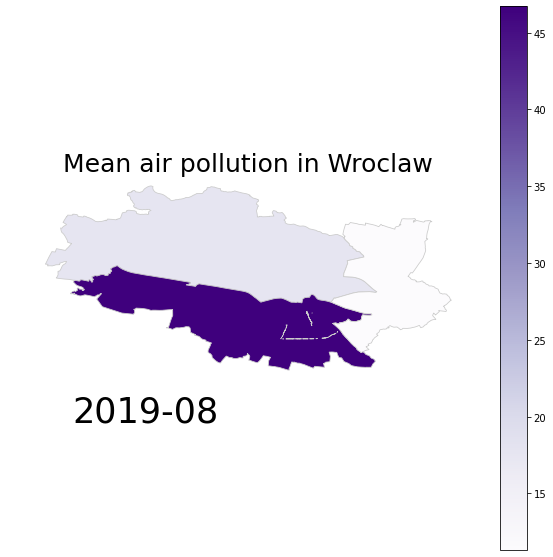

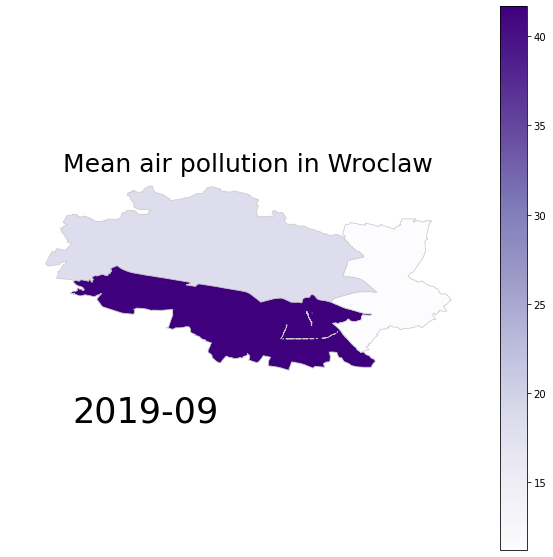

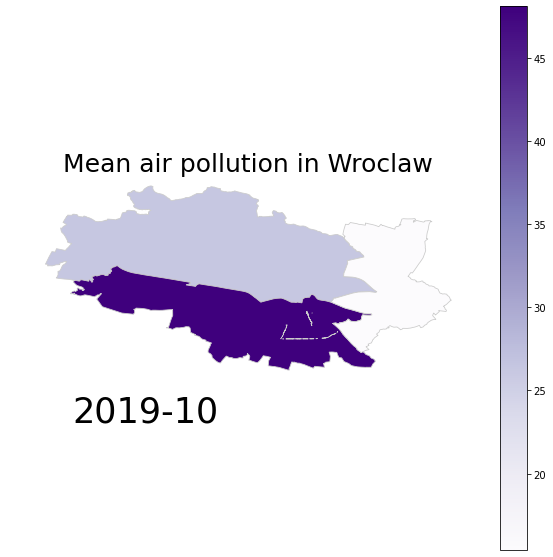

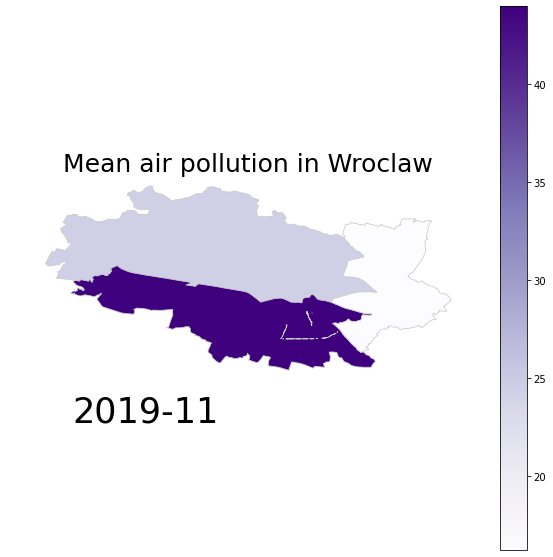

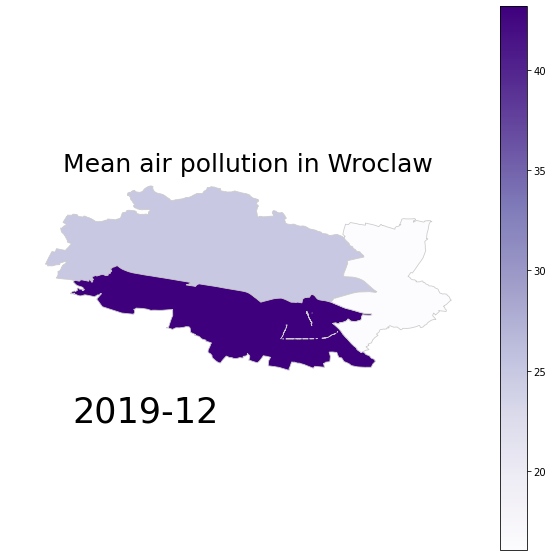

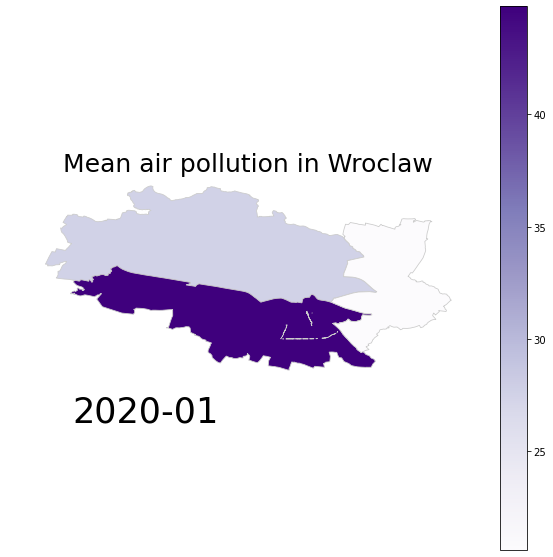

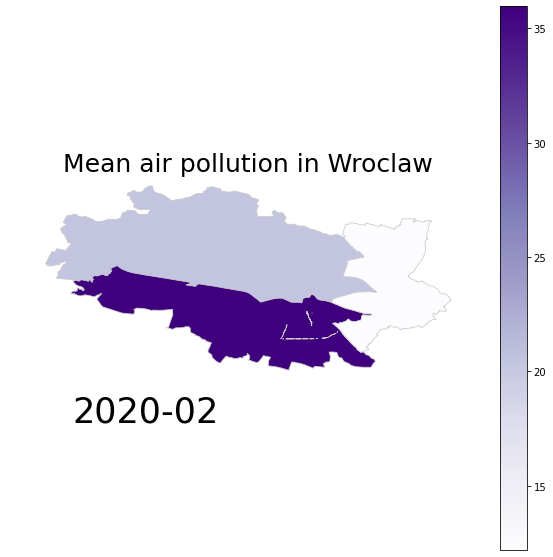

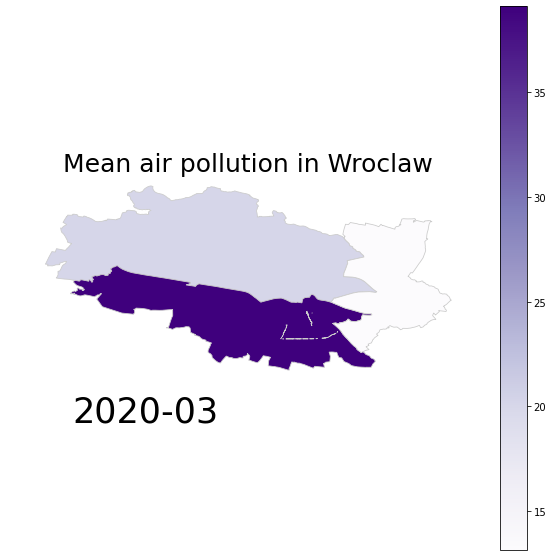

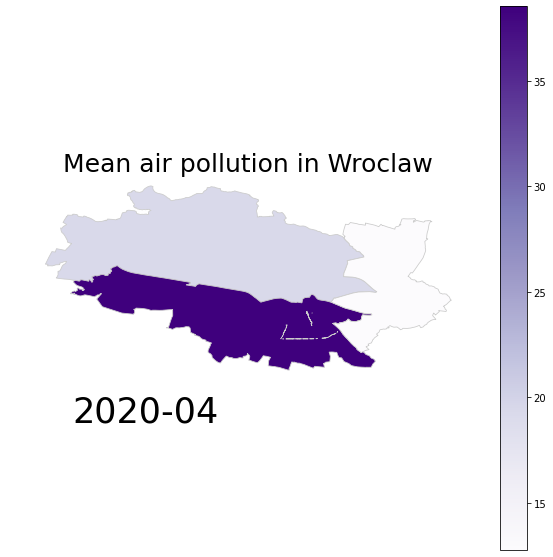

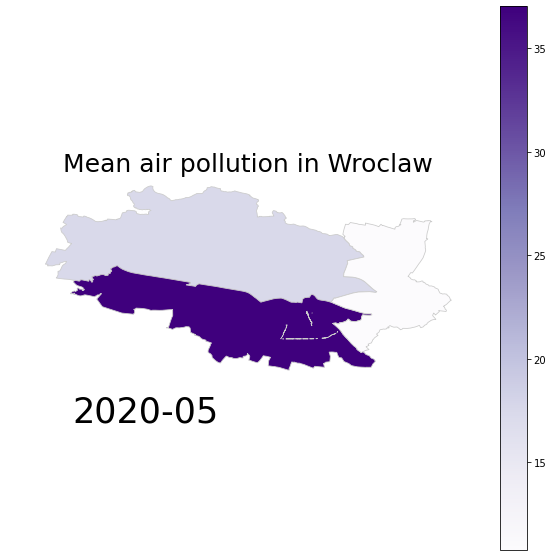

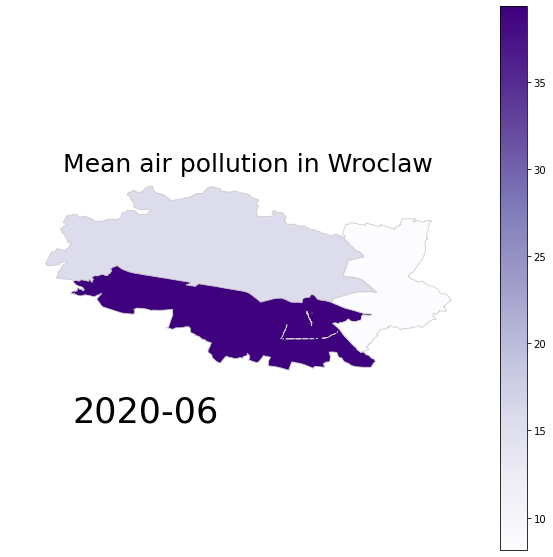

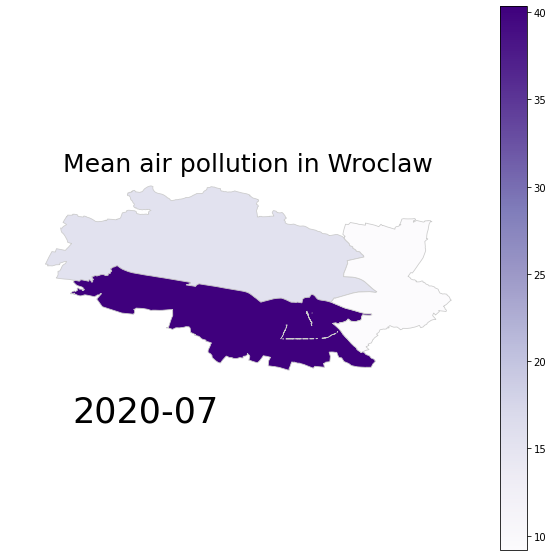

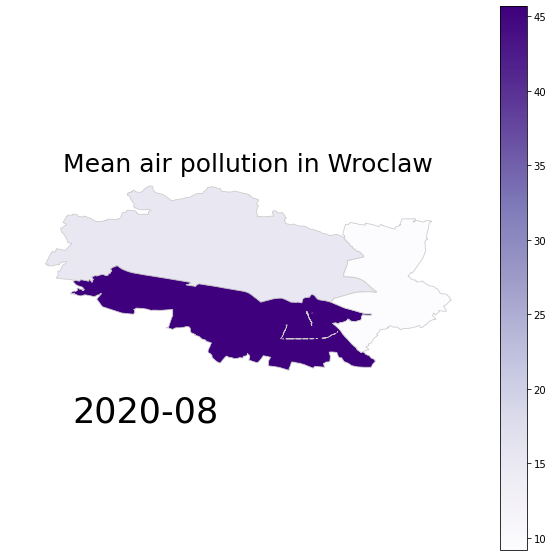

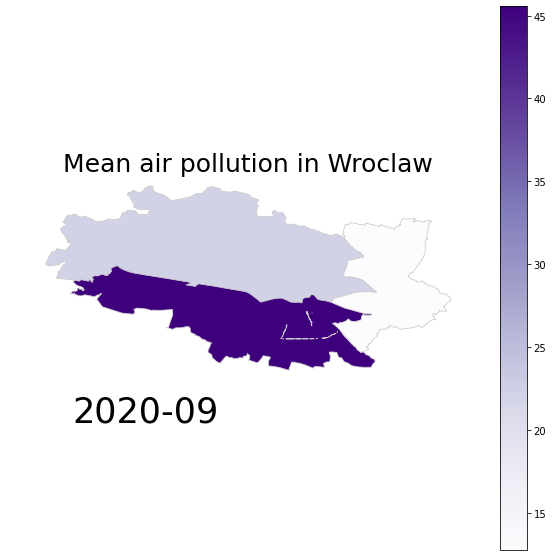

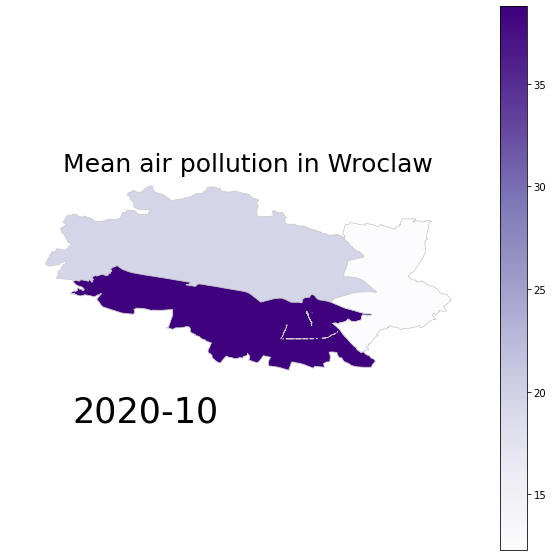

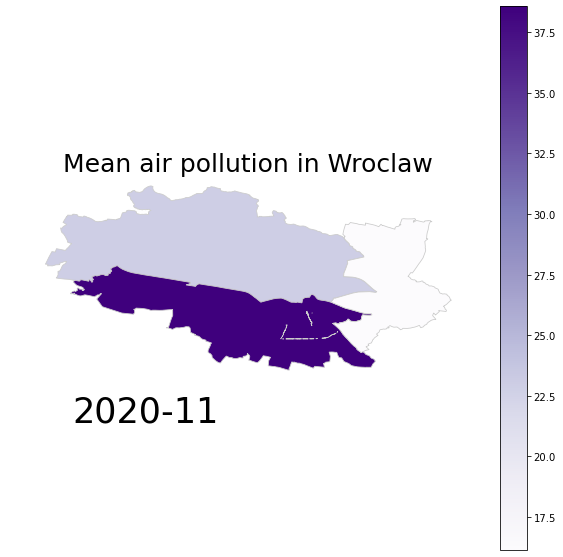

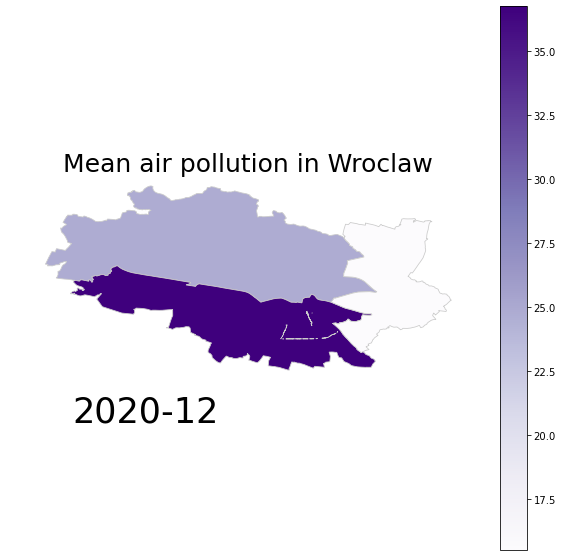

In [103]:
import os
vmin, vmax = min(gdf.Value), max(gdf.Value)
output_path = 'charts\maps'

# start the for loop to create one map per year
for year in years:
    for month in range(12):
        if month < 9:
            mon = f'0{month + 1}'
        else:
            mon = f'{month + 1}'
        merged1 = gifs[gifs.timestamp == f'{year}-{mon}']
        # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
        fig = merged1.plot(column='Value', cmap='Purples', figsize=(10,10), linewidth=0.8, edgecolor='0.8', legend=True)

        # remove axis of chart
        fig.axis('off')

        # add a title
        fig.set_title('Mean air pollution in Wroclaw', \
                  fontdict={'fontsize': '25',
                             'fontweight' : '3'})


        # position the annotation to the bottom left
        fig.annotate( f'{year}-{mon}',
                xy=(0.1, .225), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=35)

        # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
        filepath = os.path.join(output_path, f'{year}-{mon}.png')
        chart = fig.get_figure()
        chart.savefig(filepath, dpi=300)

In [104]:
import imageio
images = []
for year in years:
    for month in range(12):
        if month < 9:
            mon = f'0{month + 1}'
        else:
            mon = f'{month + 1}'
        images.append(imageio.imread(f'.\charts\maps\{year}-{mon}.png'))
imageio.mimsave('.\charts\movie.gif', images, duration=1)

In [135]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
df = pd.DataFrame(columns=['timestamp', 'Value', 'geometry', 'station_name'])
names = [DsWrocWybConName, DsWrocAlWisnName, DsWrocBartniName]

for year in years:
    for name in names:
        values = []
        for _, row in gdf.iterrows():
            if row.timestamp[:4] == f'{year}' and row.station_name == name:
                values.append(float(row.Value))
        geometry = gdf[gdf.station_name == name].geometry[0]
        if len(values) == 0:
            mean = 0
        else:
            mean = statistics.mean(values)
        df2 = pd.DataFrame(data=[[f'{year}', mean, geometry, name]], columns=['timestamp', 'Value', 'geometry', 'station_name'])
        df = df.append(df2)

In [136]:
gifs = gpd.GeoDataFrame(df)

In [137]:
gifs

timestamp      Value                                           geometry  \
0      2015  25.077401  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2015  53.774349  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2015  17.098519  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0      2016  24.117352  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2016  49.199635  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2016  19.541208  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0      2017  22.113383  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2017  48.123784  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2017  15.414524  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0      2018  21.934595  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2018  45.579203  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2018  16.175435  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0      2019  20.454529  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2019  44.156550  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2019  13.627193  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0      2020  20.020673  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2020  40.054772  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2020  12.737676  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   

   station_name  
0  DsWrocWybCon  
0  DsWrocAlWisn  
0  DsWrocBartni  
0  DsWrocWybCon  
0  DsWrocAlWisn  
0  DsWrocBartni  
0  DsWrocWybCon  
0  DsWrocAlWisn  
0  DsWrocBartni  
0  DsWrocWybCon  
0  DsWrocAlWisn  
0  DsWrocBartni  
0  DsWrocWybCon  
0  DsWrocAlWisn  
0  DsWrocBartni  
0  DsWrocWybCon  
0  DsWrocAlWisn  
0  DsWrocBartni

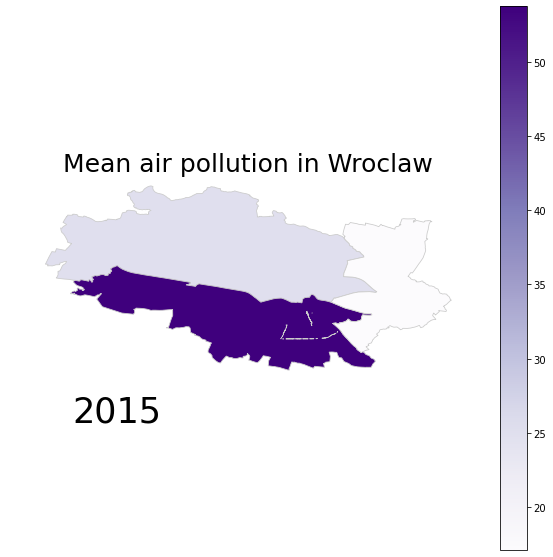

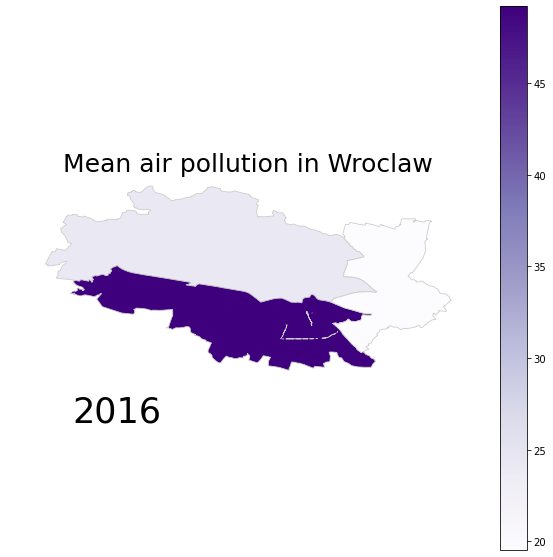

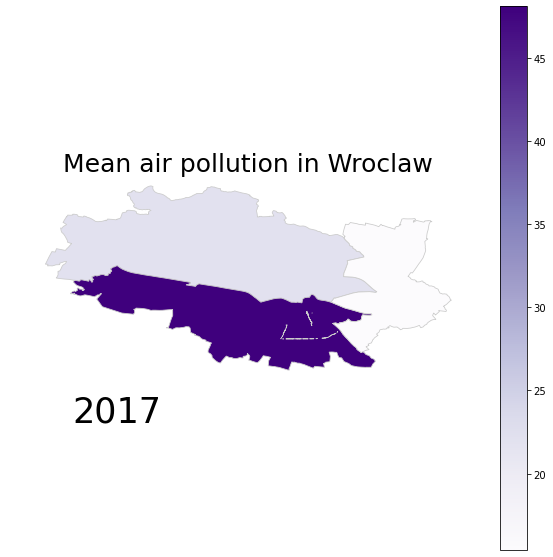

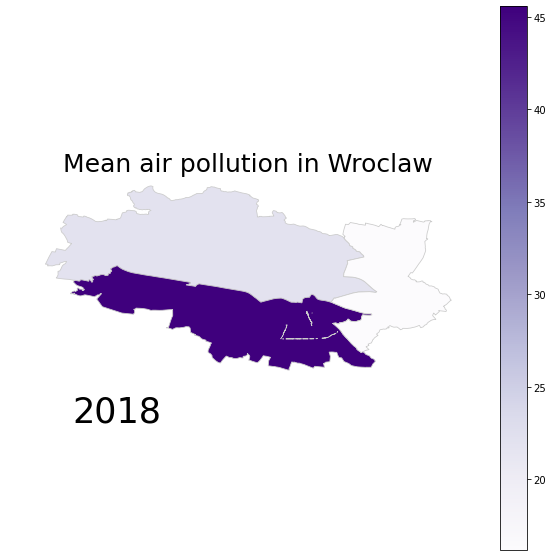

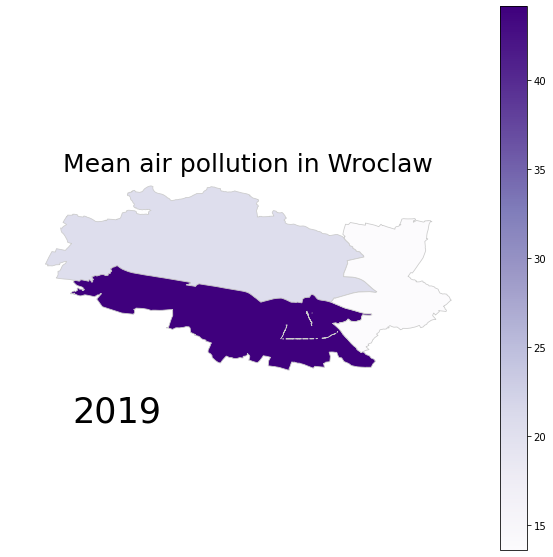

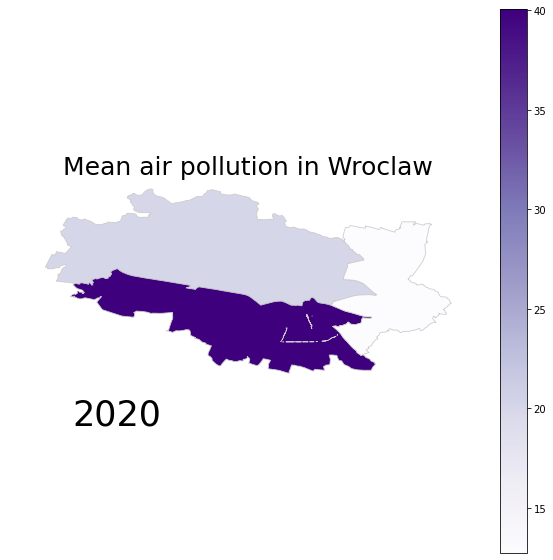

In [138]:
for year in years:
    merged1 = gifs[gifs.timestamp == f'{year}']
        # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = merged1.plot(column='Value', cmap='Purples', figsize=(10,10), linewidth=0.8, edgecolor='0.8', legend=True)

        # remove axis of chart
    fig.axis('off')

        # add a title
    fig.set_title('Mean air pollution in Wroclaw', \
                  fontdict={'fontsize': '25',
                             'fontweight' : '3'})


        # position the annotation to the bottom left
    fig.annotate( f'{year}',
                xy=(0.1, .225), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=35)

        # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, f'{year}.png')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [139]:
images = []
for year in years:
    images.append(imageio.imread(f'.\charts\maps\{year}.png'))
imageio.mimsave('.\charts\movie2.gif', images, duration=1)

In [140]:
import pandas as pd
filename = "../data/piece.csv"
df = pd.read_csv(filename)  
gdf_furnace = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

In [141]:
gdf_furnace

Unnamed: 0            address        lat        lon  2014  2015  2016  \
0             0   ul.Abramowskiego  51.103360  17.106519     0     1     0   
1             1       ul.Canaletta  51.104487  17.116522     0     0     0   
2             2  ul.Mielczarskiego  51.103296  17.107926     1     1     0   
3             3        ul.Norblina  51.101927  17.108948     0     0     1   
4             4          ul.Plater  51.107197  17.108386     0     0     1   
..          ...                ...        ...        ...   ...   ...   ...   
955         955  ul.Roździeńskiego  51.118731  16.927296     0     0     0   
956         956      ul.Rumiankowa  51.121588  16.924209     0     0     3   
957         957   ul.Skrzetuskiego  51.116532  16.927594     0     0     0   
958         958         ul.Zagłoby  51.118702  16.927767     0     0     0   
959         959      ul.Żurawinowa  51.114134  16.923292     0     0     0   

     2017  2018  2019  2020  2021  all                   geometry  
0       1     0     0     0     0    2  POINT (17.10652 51.10336)  
1       1     0     0     0     0    1  POINT (17.11652 51.10449)  
2       0     0     0     0     0    2  POINT (17.10793 51.10330)  
3       0     0     0     0     0    1  POINT (17.10895 51.10193)  
4       3     4     1     1     0   10  POINT (17.10839 51.10720)  
..    ...   ...   ...   ...   ...  ...                        ...  
955     0     0     0     0     0    1  POINT (16.92730 51.11873)  
956     0     0     3     1     0    7  POINT (16.92421 51.12159)  
957     0     1     0     1     0    2  POINT (16.92759 51.11653)  
958     1     0     2     1     0    4  POINT (16.92777 51.11870)  
959     0     2     0     0     0    2  POINT (16.92329 51.11413)  

[960 rows x 14 columns]

<AxesSubplot:>

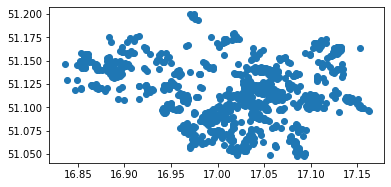

In [143]:
gdf_furnace.plot()

In [144]:
idx = 0
counts = []
for row in gifs.iterrows():
    count = 0
    for _, furnace in gdf_furnace.iterrows():
        hit = row[1].geometry.contains(furnace.geometry)
        if hit == True:
            column = row[1].timestamp[:4]
            count += furnace[column]
    counts.append(count)

gifs['furnace'] = counts

In [145]:
gifs

timestamp      Value                                           geometry  \
0      2015  25.077401  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2015  53.774349  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2015  17.098519  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0      2016  24.117352  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2016  49.199635  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2016  19.541208  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0      2017  22.113383  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2017  48.123784  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2017  15.414524  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0      2018  21.934595  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2018  45.579203  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2018  16.175435  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0      2019  20.454529  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2019  44.156550  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2019  13.627193  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   
0      2020  20.020673  POLYGON ((17.02143 51.10808, 17.02135 51.10808...   
0      2020  40.054772  POLYGON ((16.99087 51.05728, 16.99084 51.05688...   
0      2020  12.737676  POLYGON ((17.14563 51.08267, 17.14504 51.08242...   

   station_name  furnace  
0  DsWrocWybCon      611  
0  DsWrocAlWisn      487  
0  DsWrocBartni       75  
0  DsWrocWybCon      876  
0  DsWrocAlWisn      506  
0  DsWrocBartni      127  
0  DsWrocWybCon     1042  
0  DsWrocAlWisn      633  
0  DsWrocBartni      134  
0  DsWrocWybCon     1097  
0  DsWrocAlWisn      545  
0  DsWrocBartni      153  
0  DsWrocWybCon      865  
0  DsWrocAlWisn      446  
0  DsWrocBartni      125  
0  DsWrocWybCon      774  
0  DsWrocAlWisn      476  
0  DsWrocBartni      150

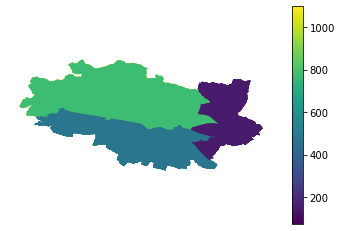

In [153]:
gifs.plot(column='furnace', legend=True)
import matplotlib.pyplot as plt
plt.axis('off')
plt.savefig('change_furnace.jpg')

In [191]:
df = gifs
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'
y = df['Value']
ylag = lps.weights.lag_spatial(wq, y)
ylagq5 = mc.Quantiles(ylag, k=5)

C:\Users\Mati\anaconda3\envs\geo-tutorial\lib\site-packages\libpysal\weights\_contW_lists.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(it.chain(*(list(zip(*shape.coords.xy)) for shape in shape)))


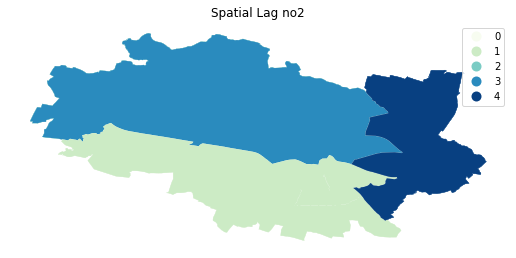

In [192]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag no2")

plt.show()

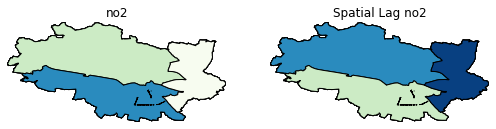

In [193]:
df['lag_median_no2'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='Value', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("no2")
df.plot(column='lag_median_no2', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag no2")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [169]:
for _, row in gdf2.iterrows():
    for _, row2 in gifs.iterrows():
        hit = row2.geometry.contains(row.geometry)
        print(hit)
        break
    break
    


counts = []

for _, row in gdf2.iterrows():
    count = 0

    for _, furnace in gdf_furnace.iterrows():
        hit = row.geometry.contains(furnace.geometry)
        if hit == True:
            count += furnace['all']
    counts.append(count)


gdf2['furnace'] = counts


False


In [222]:
gdf2

OBJECTID  NROSIEDLA                                      NAZWAOSIED  \
0        340         21                              Krzyki - Partynice   
1        341         24                           Gądów - Popowice Płd.   
2        348         42                                     Sołtysowice   
3        349         18                                      Bieńkowice   
4        351         32                                         Żerniki   
5        352         29                                 Muchobór Wielki   
6        353         10                           Przedmieście Oławskie   
7        354         14                                             Gaj   
8        355         48                                        Wojszyce   
9        356         15                                           Borek   
10       357         20                                        Ołtaszyn   
11       358         22                                         Klecina   
12       359         25                                   Muchobór Mały   
13       342         11                                        Tarnogaj   
14       343         43                 Polanowice - Poświętne - Ligota   
15       344          7                                Plac Grunwaldzki   
16       345          4                                        Nadodrze   
17       346         19                                         Jagodno   
18       347         30                                       Nowy Dwór   
19       321         12                                            Huby   
20       322         33  Jerzmanowo - Jarnołtów - Strachowice - Osiniec   
21       323         31                                         Kuźniki   
22       324         16                                          Księże   
23       325         41                                       Pawłowice   
24       326         46                                        Świniary   
25       327         45                                 Lipa Piotrowska   
26       328          2                         Przedmieście Świdnickie   
27       329         38                                          Kowale   
28       330          1                                    Stare Miasto   
29       331          8                  Zacisze - Zalesie - Szczytniki   
30       332         27                         Grabiszyn - Grabiszynek   
31       333         36                               Pracze Odrzańskie   
32       334         28                                          Oporów   
33       335         47                              Osobowice - Rędzin   
34       336         39                 Strachocin - Swojczyce - Wojnów   
35       337         40                           Psie Pole - Zawidawie   
36       338         37                             Karłowice - Różanka   
37       339         23              Pilczyce - Kozanów - Popowice Płn.   
38       350         34                                         Leśnica   
39       362         13                             Powstańców Śląskich   
40       363         26                                        Gajowice   
41       364          3                                        Szczepin   
42       365         35                                         Maślice   
43       366          6                                           Ołbin   
44       367          5                                        Kleczków   
45       368          9       Biskupin - Sępolno - Dąbie - Bartoszowice   
46       360         17                                         Brochów   
47       361         44                                          Widawa   

          DATA    SHAPE_AREA     SHAPE_LEN  \
0   2016-01-21  5.254965e+06   9994.583078   
1   2016-01-21  3.134569e+06   7588.647951   
2   2016-01-21  4.547041e+06   9003.773230   
3   2016-01-21  1.433161e+06   4760.314072   
4   2016-01-21  3.908726e+06   9132.805421   
5   2016-01-21  6.879545e+06  13228.130080   
6   20

<AxesSubplot:>

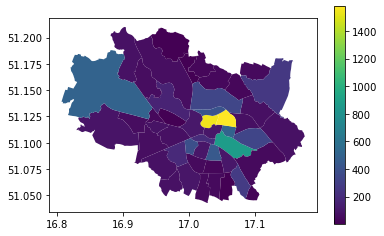

In [223]:
gdf2.plot(column='furnace', legend=True)

<AxesSubplot:>

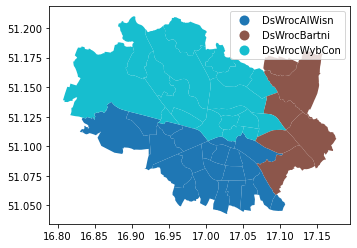

In [224]:
gdf2.plot(column='station', legend=True)

In [257]:
df = gdf2[['NAZWAOSIED', 'geometry', 'station', 'furnace']]
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'
y = df['furnace']
ylag = lps.weights.lag_spatial(wq, y)
ylagq5 = mc.Quantiles(ylag, k=5)

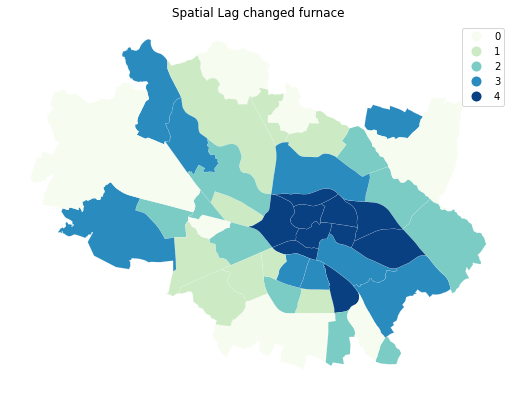

In [258]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag changed furnace")

plt.show()

C:\Users\Mati\anaconda3\envs\geo-tutorial\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


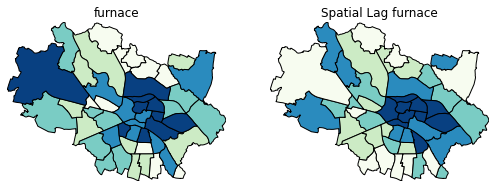

In [227]:
df['lag_median_furnace'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='furnace', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("furnace")
df.plot(column='lag_median_furnace', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag furnace")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [228]:
y.median()

73.5

In [229]:
yb = y > y.median()
sum(yb)

24

Dla 24 osiedli liczba wymienionych piecy jest powyżej mediany a drugie 24 poniżej 

In [230]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb]
df['yb'] = yb

C:\Users\Mati\anaconda3\envs\geo-tutorial\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<AxesSubplot:>

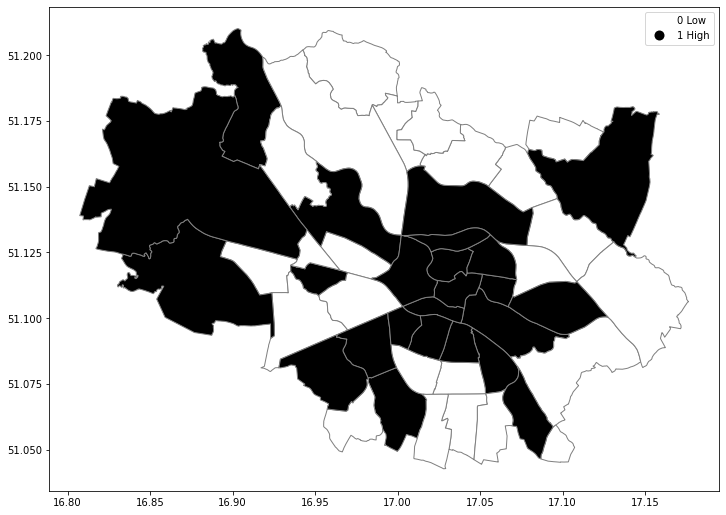

In [231]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In [232]:
import esda
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

In [233]:
jc.bb + jc.ww + jc.bw

119.0

In [234]:
wq.s0 / 2

119.0

In [235]:
jc.bb

39.0

In [236]:
jc.mean_bb

29.164164164164163

Text(0.5, 0, 'BB Counts')

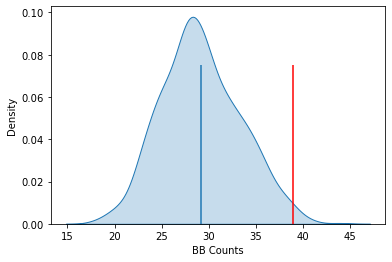

In [237]:
import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.075, color='r')
plt.vlines(jc.mean_bb, 0,0.075)
plt.xlabel('BB Counts')

In [238]:
jc.p_sim_bb

0.017

In [239]:
wq.transform = 'r'
y = df['furnace']

In [240]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.24718627309543342

Text(0.5, 0, "Moran's I")

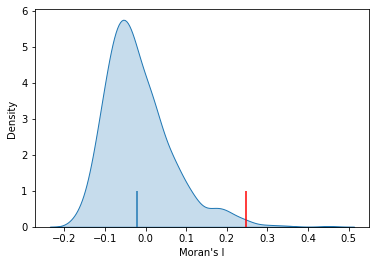

In [241]:
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [242]:
mi.p_sim

0.009

In [243]:
np.random.seed(12345)
import esda
wq.transform = 'r'
lag_furnace = lps.weights.lag_spatial(wq, df['furnace'])

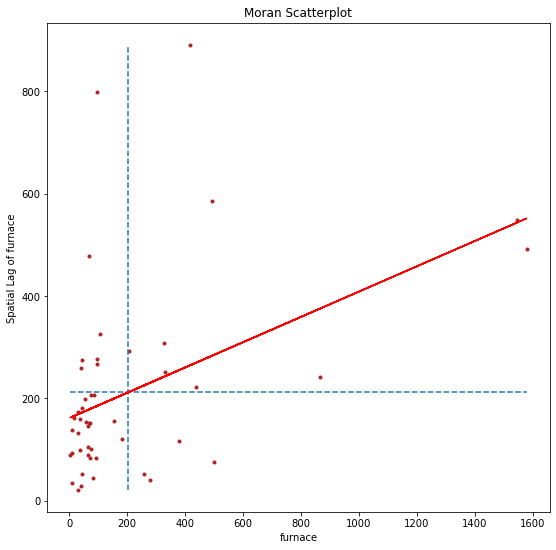

In [244]:
furnace = df['furnace']
b, a = np.polyfit(furnace, lag_furnace, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(furnace, lag_furnace, '.', color='firebrick')

 # dashed vert at mean of the furnace
plt.vlines(furnace.mean(), lag_furnace.min(), lag_furnace.max(), linestyle='--')
 # dashed horizontal at mean of lagged furnace
plt.hlines(lag_furnace.mean(), furnace.min(), furnace.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(furnace, a + b*furnace, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of furnace')
plt.xlabel('furnace')
plt.show()

In [245]:
li = esda.moran.Moran_Local(y, wq)
li.q

array([3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 1, 2, 3,
       2, 2, 3, 3, 1, 3, 2, 2, 3, 2, 3, 3, 3, 4, 1, 3, 4, 2, 4, 2, 3, 1,
       1, 1, 4, 3])

In [246]:
len(li.q)

48

In [247]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

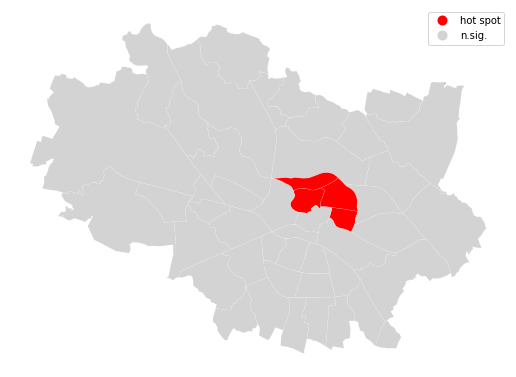

In [248]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

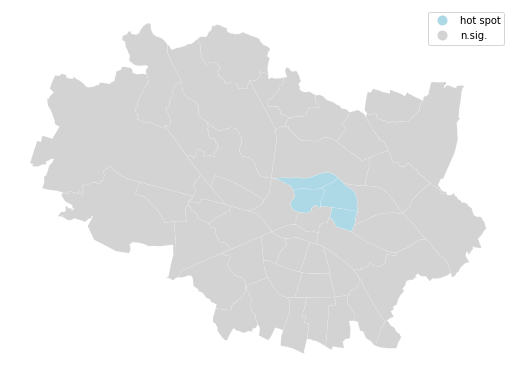

In [249]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [250]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

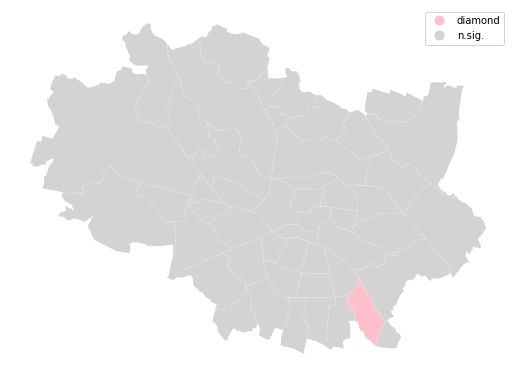

In [251]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [252]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 4, 3])

In [253]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

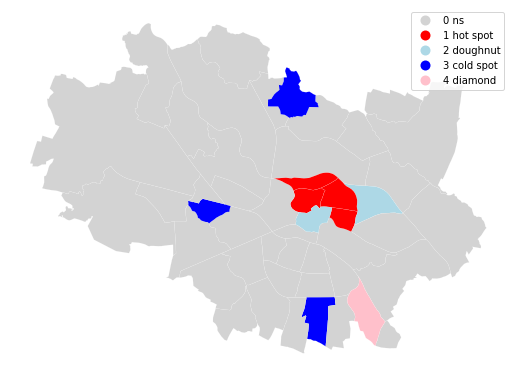

In [254]:

from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

<AxesSubplot:>

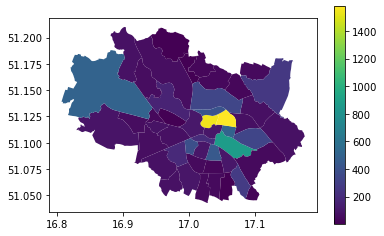

In [255]:
gdf2.plot(column='furnace', legend=True)